In [1]:
import sympy
import matplotlib.pyplot as plt

## Approximation of $c_l$

In [2]:
# Define the symbols
z = sympy.Symbol('z')
b = sympy.Symbol('b')
k = sympy.Symbol('k')
n = sympy.Symbol('n')

### Computation of the roots

Define the function whose roots are the singularities of $C$:
$$p(z)=1-2kz+2kz\sqrt{1-4bzn}-4bnz$$

In [3]:
p = 1-2*k*z+2*k*z*sympy.sqrt(1-4*b*z*n)-4*b*n*z
p

-4*b*n*z + 2*k*z*sqrt(-4*b*n*z + 1) - 2*k*z + 1

Finding the roots of $p$ directly does not work. So, instead define $q$, the auxiliary polynomial for which we have $p(z_0)=0\Rightarrow q(z_0)=0$:
$$q(z)=(1-2kz-4bnz)^2 - 4k^2z^2(1-4bnz)$$

In [4]:
q = (1-2*k*z-4*b*n*z)**2-4*k**2*z**2*(1-4*b*n*z)
q

-4*k**2*z**2*(-4*b*n*z + 1) + (-4*b*n*z - 2*k*z + 1)**2

In [5]:
q = q.expand()
q

16*b**2*n**2*z**2 + 16*b*k**2*n*z**3 + 16*b*k*n*z**2 - 8*b*n*z - 4*k*z + 1

In [6]:
a1, a2, a3, a4 = sympy.Poly(q, z).all_coeffs()
a1, a2, a3, a4

(16*b*k**2*n, 16*b**2*n**2 + 16*b*k*n, -8*b*n - 4*k, 1)

In [7]:
Q = (3*a1*a3-a2**2) / (9*a1**2)
R = (9*a1*a2*a3-27*a1**2*a4-2*a2**3) / (54*a1**3)
print(sympy.latex(sympy.cancel(Q)))
print(sympy.latex(sympy.cancel(R)))
print(sympy.latex((Q**3+R**2).cancel()))

\frac{- 4 b^{3} n^{3} - 8 b^{2} k n^{2} - 10 b k^{2} n - 3 k^{3}}{36 b k^{4} n}
\frac{- 32 b^{4} n^{4} - 96 b^{3} k n^{3} - 168 b^{2} k^{2} n^{2} - 140 b k^{3} n - 63 k^{4}}{864 b k^{6} n}
\frac{- 8 b^{2} n^{2} - 13 b k n - 16 k^{2}}{27648 b^{3} k^{5} n^{3}}


In [8]:
S = ((R + (Q**3 + R**2)**(1/2))**(1/3)).cancel()
T = ((R - (Q**3 + R**2)**(1/2))**(1/3)).cancel()

In [9]:
x1 = S + T - a2 / (3*a1)
x2 = - (S + T) / 2 - a2 / (3*a1) + (sympy.I*3**(1/2) / 2)*(S - T)
x3 = - (S + T) / 2 - a2 / (3*a1) - (sympy.I*3**(1/2) / 2)*(S - T)

How to assess which of $x_1$, $x_2$, and $x_3$ are also roots of $p$ we could simply plug them into $p$ and see if they are 0. However, this will not work so easily since it is symbolically too complicated to check if they are 0. Instead we plug them in and then put in various values for $b$, $k$, and $n$ and check these evaluations. The values we are interested in are: $b=4$, $k=1,...,6$ and $n=1,...,10$.

In [10]:
def check_if_root(p, s):
    p = p.subs(z, s)
    pb = p.subs(b, 4)
    for K in range(1, 7):
        pbk = pb.subs(k, K)
        for N in range(1, 11):
            pbkn = pbk.subs(n, N)
            if sympy.Abs(pbkn).n() > 10**(-8):
                return False
    return True

In [11]:
check_if_root(p, x1), check_if_root(p, x2), check_if_root(p, x3)

(True, True, False)

In [12]:
# Just out of curiosity and we need it later in the proof of Theorem 2.3
p_alternative = 1-2*k*z-2*k*z*sympy.sqrt(1-4*b*z*n)-4*b*n*z
p_alternative

-4*b*n*z - 2*k*z*sqrt(-4*b*n*z + 1) - 2*k*z + 1

In [13]:
check_if_root(p_alternative, x1), check_if_root(p_alternative, x2), check_if_root(p_alternative, x3)

(False, False, True)

### Simple approximation based solely on the root

This yields that $x_1$ and $x_2$ are (at least for the checked values) roots of $p$ and $x_3$ is a root of the "alternative" polynomial (choosing the opposite branch of the root in B). In the paper, we show that $|x_1|<|x_2|$, so $|x_1|^{-l}$ gives a first approximate growth rate of $c_l$ and, furthermore, $|x_1|=x_1$. The roots, however, look awfully complicated. Therefore, we do not use them directly and instead evaluate them for different values of $b$, $k$, and $n$, to get an approximation for $c_l$ in those different cases. 

In [14]:
# Approximation for c_l
x1b = x1.subs(b, 4)
for N in range(1,11):
    print(f'{N} & ', end='')
    for K in range(1,7):
        if K < 6:
            ending = ' & '
        else:
            ending = ' \\\\ \n'
        # x1b_abs = abs(sympy.Abs(x1b.subs(k, K).subs(n, N)).n())
        x1b_abs = x1b.subs(k, K).subs(n, N).n()
        print(f'{1 / sympy.re(x1b_abs):.2f}' + ending, end="")

1 & 17.43 & 18.52 & 19.47 & 20.31 & 21.09 & 21.81 \\ 
2 & 33.57 & 34.86 & 36.00 & 37.05 & 38.02 & 38.94 \\ 
3 & 49.64 & 51.03 & 52.28 & 53.45 & 54.54 & 55.57 \\ 
4 & 65.68 & 67.14 & 68.47 & 69.71 & 70.88 & 72.00 \\ 
5 & 81.71 & 83.21 & 84.60 & 85.90 & 87.14 & 88.32 \\ 
6 & 97.73 & 99.27 & 100.70 & 102.05 & 103.34 & 104.57 \\ 
7 & 113.75 & 115.32 & 116.79 & 118.17 & 119.50 & 120.77 \\ 
8 & 129.77 & 131.36 & 132.85 & 134.27 & 135.63 & 136.93 \\ 
9 & 145.78 & 147.39 & 148.91 & 150.36 & 151.74 & 153.08 \\ 
10 & 161.79 & 163.42 & 164.96 & 166.43 & 167.84 & 169.20 \\ 


In the next part we would like to find this empirically by computing the numbers $c_l$ recursively using the following recursion formulas:
$$c_l=kb_{l-1}+b\sum_{l_1=0}^{l-1}c_{l_1}c_{l-l_1-1}\text{, for }l>0\text{, }c_0=n$$
and
$$b_l=b\sum_{l_1=0}^{l-1}b_{l_1}b_{l-l_1-1}\text{, for }l>0\text{, }b_0=n.$$

In [15]:
def step_b(b, b_list):
    b_l = 0
    for i in range(len(b_list)):
        b_l += b_list[i] * b_list[len(b_list) - i - 1]
    b_l *= b
    b_list.append(b_l)

def compute_bl(b, l):
    b_list = [n]
    for i in range(l):
        step_b(b, b_list)
    return b_list

b_list = compute_bl(b, 5)
b_list

[n, b*n**2, 2*b**2*n**3, 5*b**3*n**4, 14*b**4*n**5, 42*b**5*n**6]

In [16]:
def step_c(b, k, c_list, b_list):
    c_l = 0
    for i in range(len(c_list)):
        c_l += c_list[i] * c_list[len(c_list) - i - 1]
    c_l *= b
    c_l += k*b_list[len(c_list) - 1] 
    c_list.append(c_l)
    
def compute_cl(b, k, l):
    b_list = compute_bl(b, l)
    c_list = [n]
    for i in range(l):
        step_c(b, k, c_list, b_list)
    return b_list, c_list
b_list, c_list = compute_cl(b, k, 30)

In [17]:
[cl.expand() for cl in c_list[:10]]

[n,
 b*n**2 + k*n,
 2*b**2*n**3 + 3*b*k*n**2,
 5*b**3*n**4 + 10*b**2*k*n**3 + b*k**2*n**2,
 14*b**4*n**5 + 35*b**3*k*n**4 + 8*b**2*k**2*n**3,
 42*b**5*n**6 + 126*b**4*k*n**5 + 47*b**3*k**2*n**4 + 2*b**2*k**3*n**3,
 132*b**6*n**7 + 462*b**5*k*n**6 + 244*b**4*k**2*n**5 + 26*b**3*k**3*n**4,
 429*b**7*n**8 + 1716*b**6*k*n**7 + 1186*b**5*k**2*n**6 + 218*b**4*k**3*n**5 + 5*b**3*k**4*n**4,
 1430*b**8*n**9 + 6435*b**7*k*n**8 + 5536*b**6*k**2*n**7 + 1496*b**5*k**3*n**6 + 90*b**4*k**4*n**5,
 4862*b**9*n**10 + 24310*b**8*k*n**9 + 25147*b**7*k**2*n**8 + 9140*b**6*k**3*n**7 + 980*b**5*k**4*n**6 + 14*b**4*k**5*n**5]

Let us plot our theoretical prediction for $c_{l+1} / c_l$ and our empirical computation. In the plots we can see that there is definitely a mismatch in the beginning which gets less over time. Furthermore, the empirical estimation is always lower than the theoretical one.

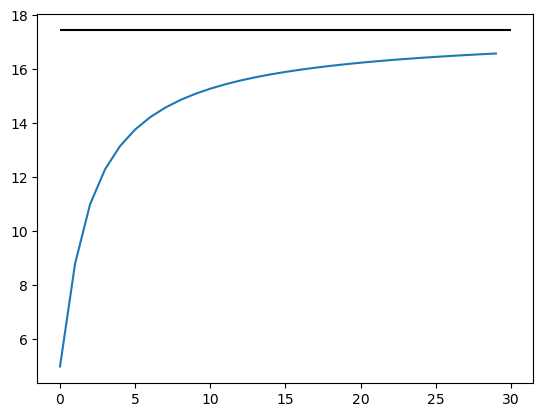

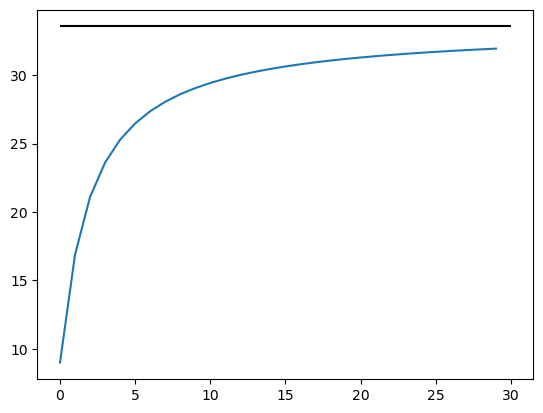

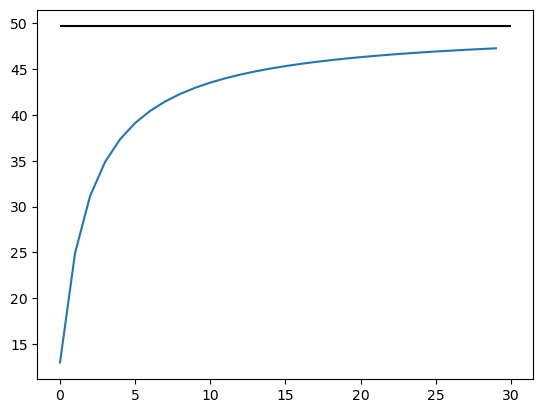

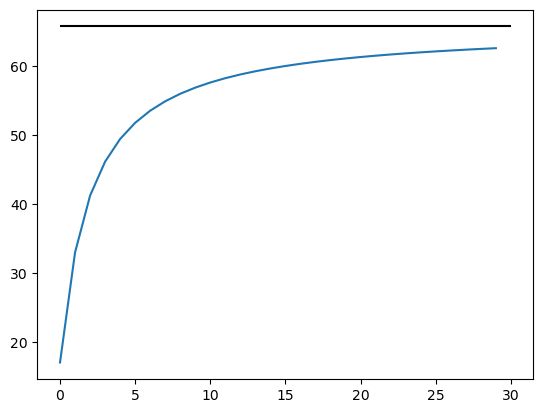

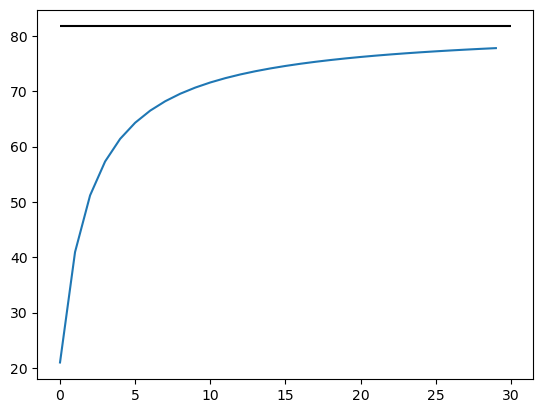

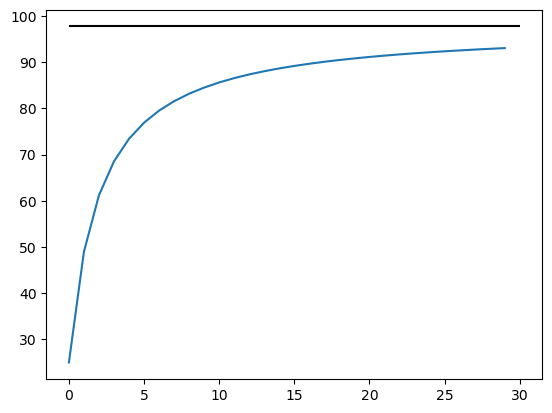

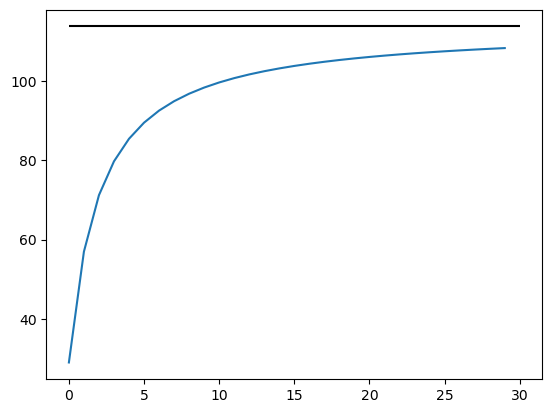

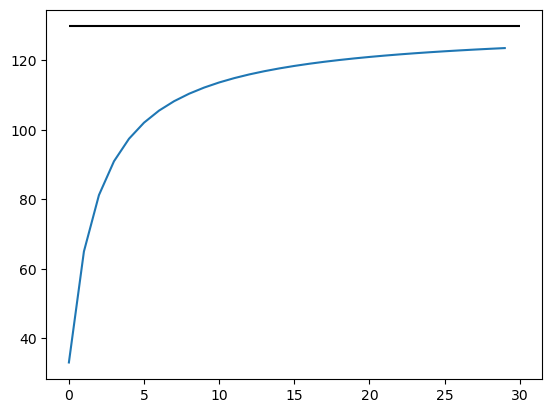

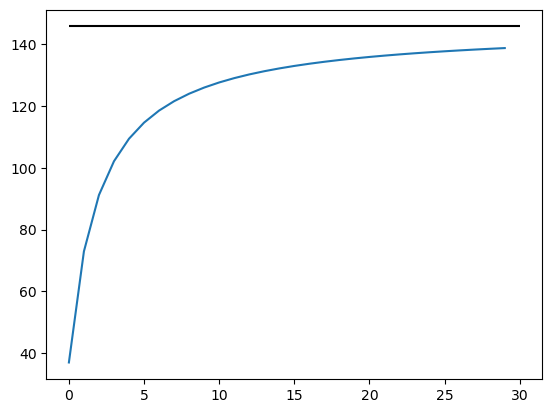

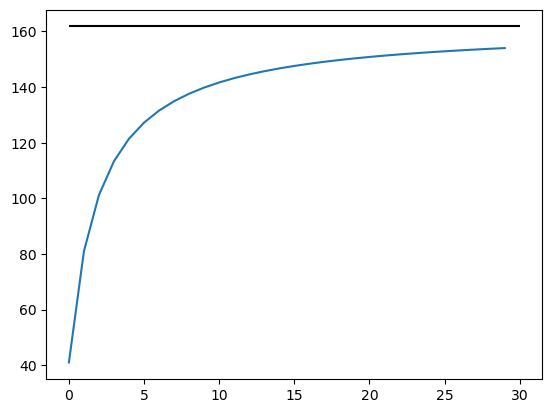

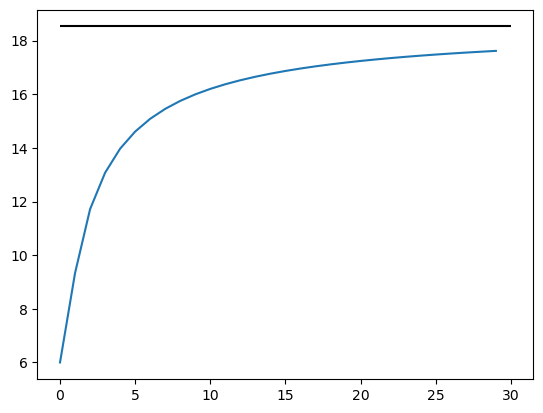

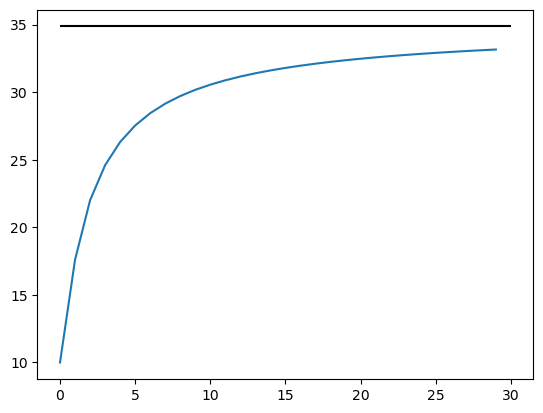

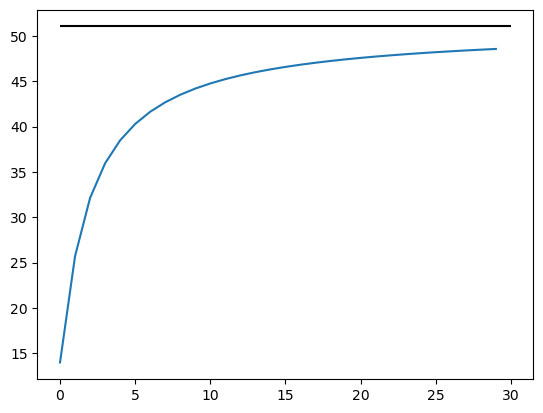

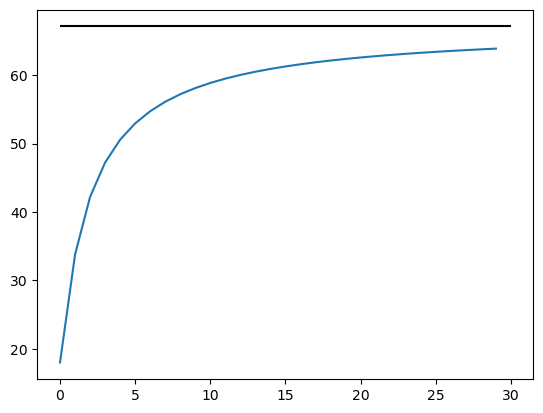

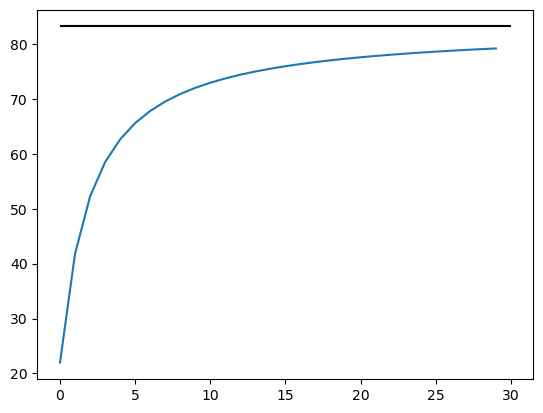

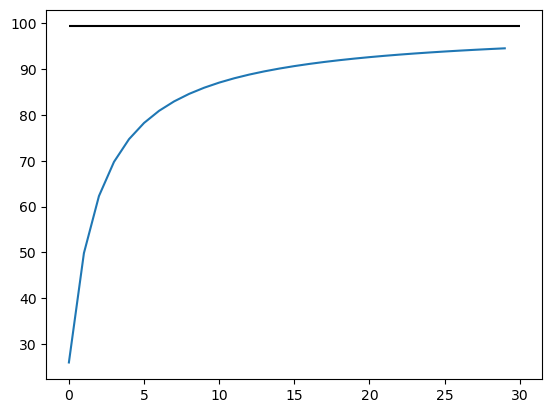

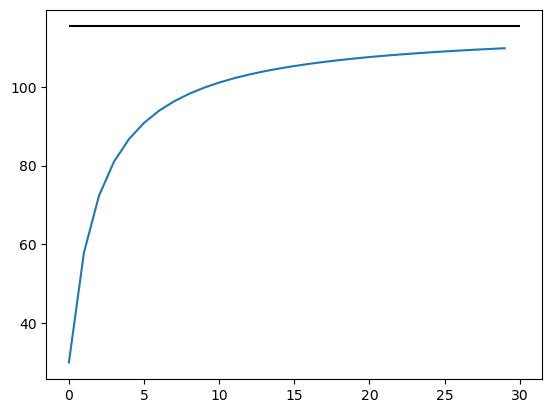

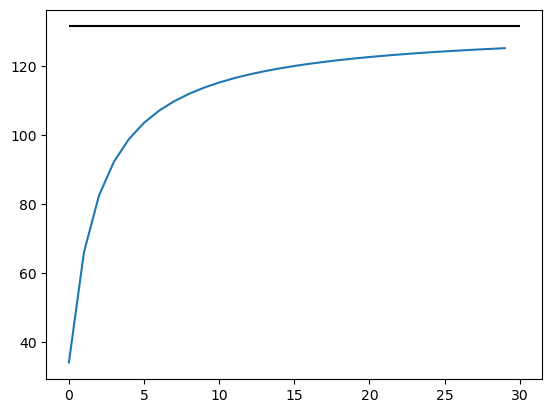

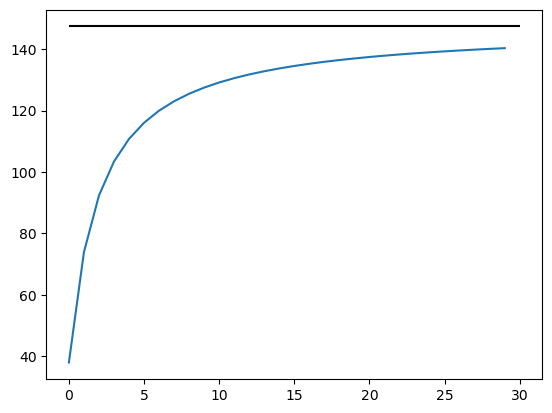

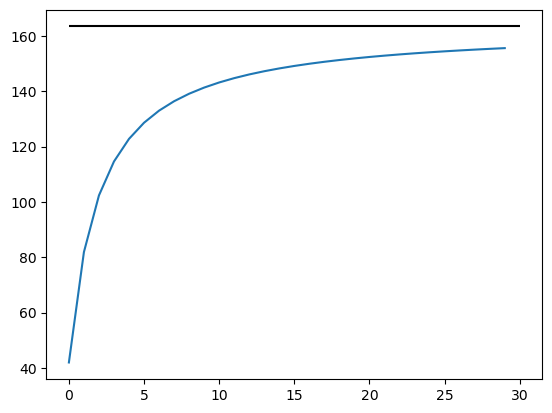

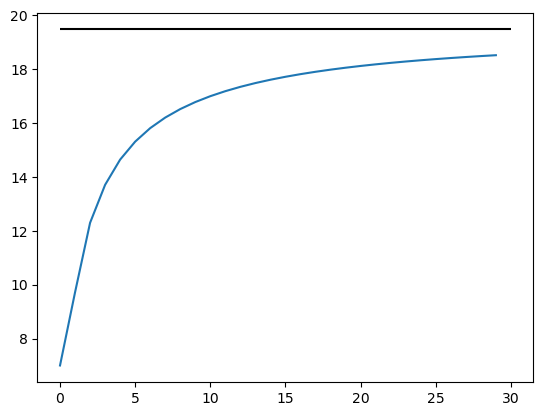

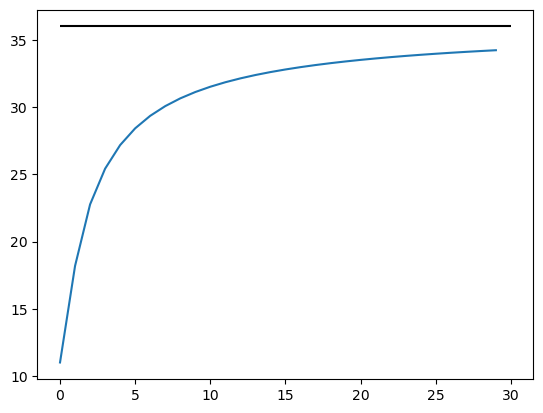

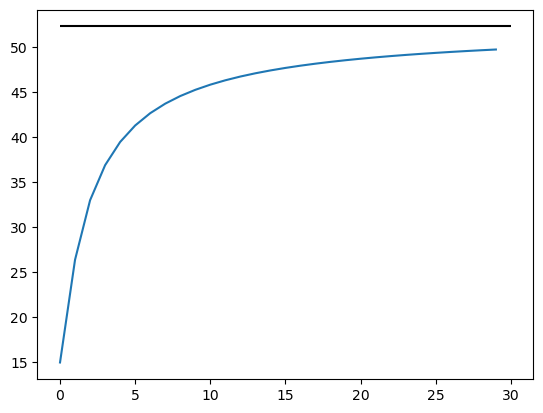

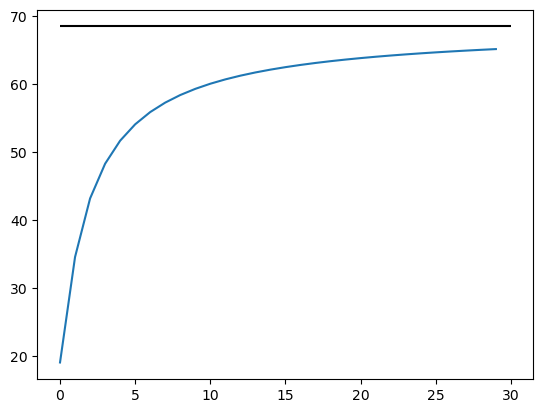

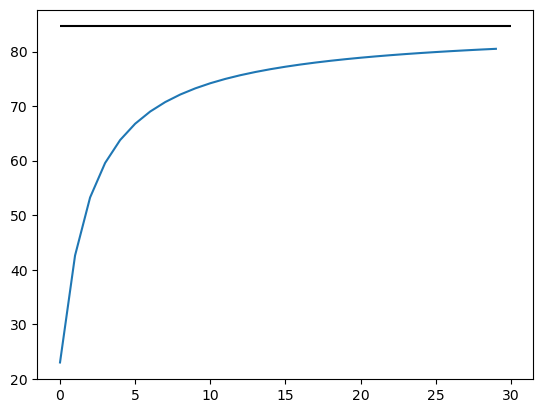

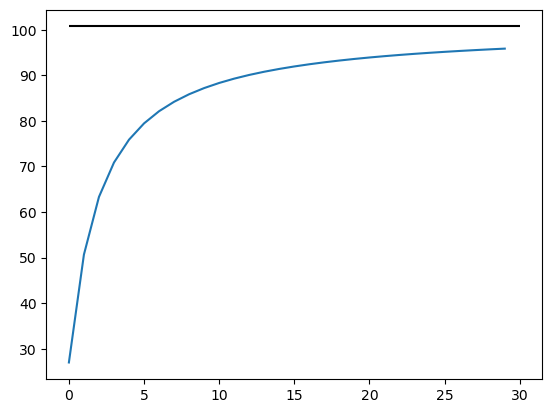

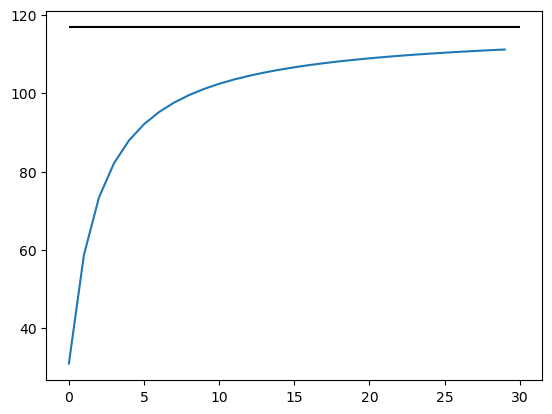

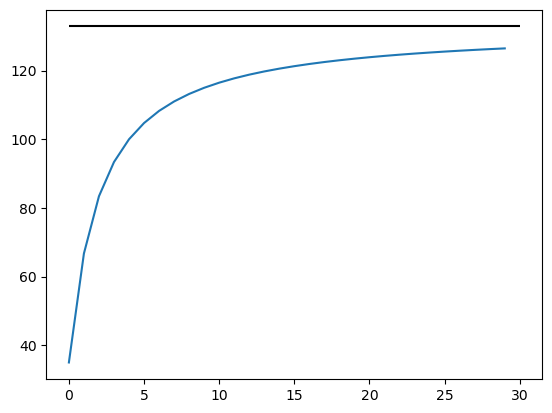

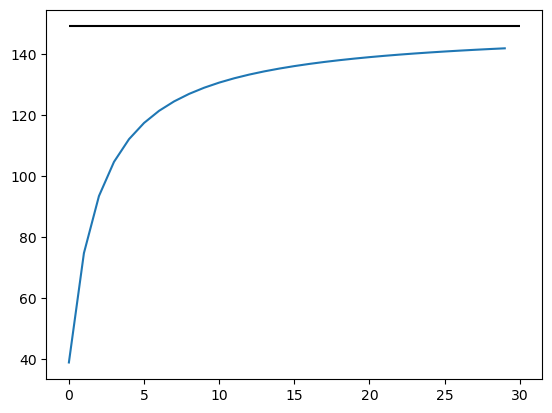

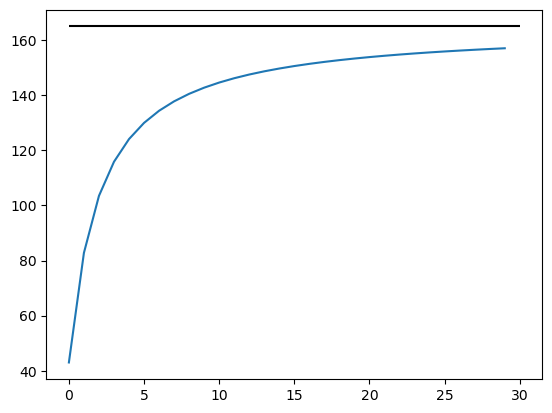

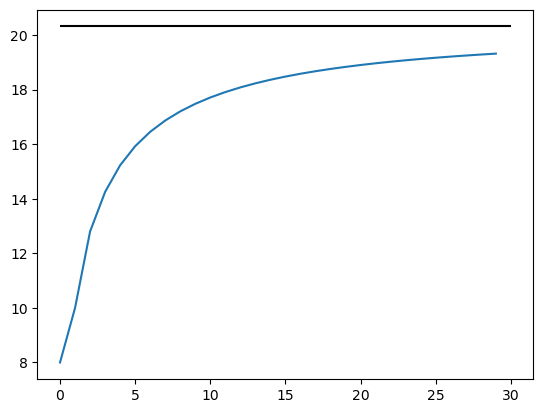

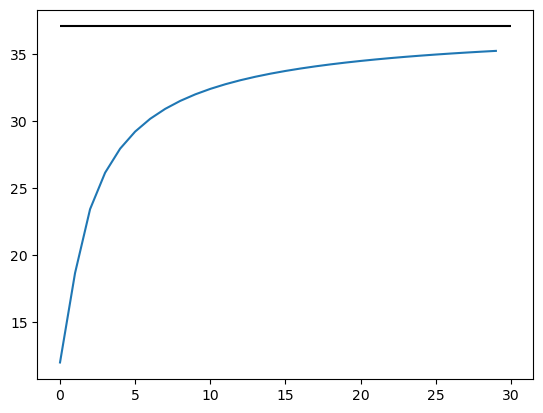

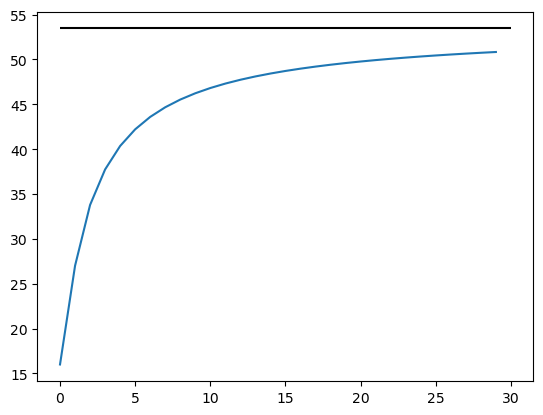

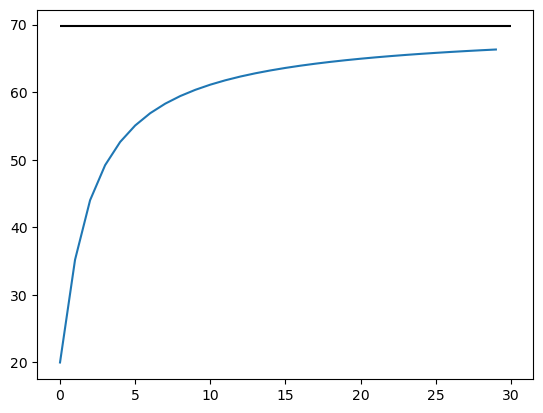

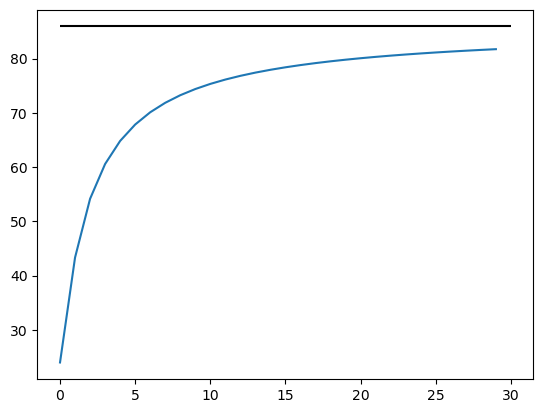

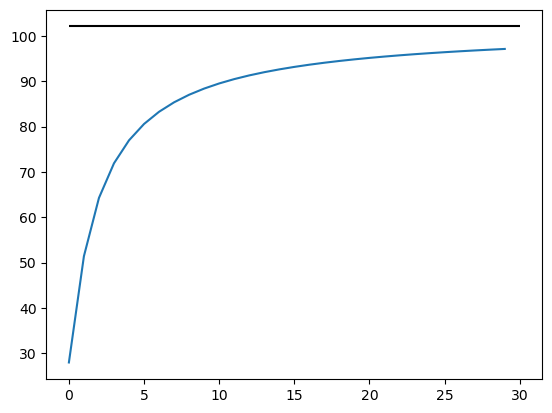

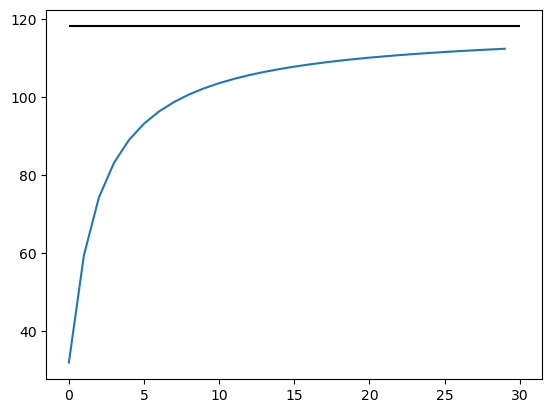

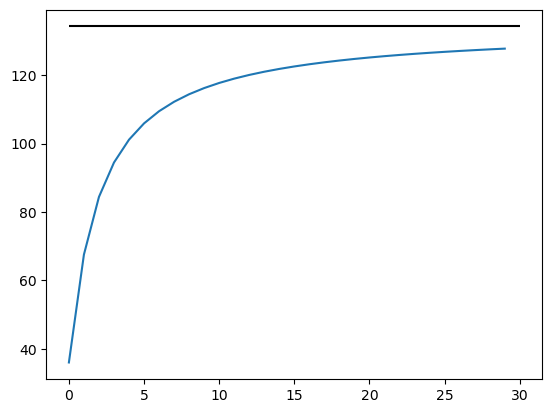

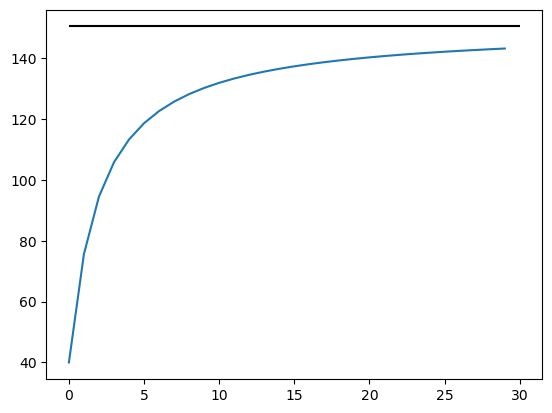

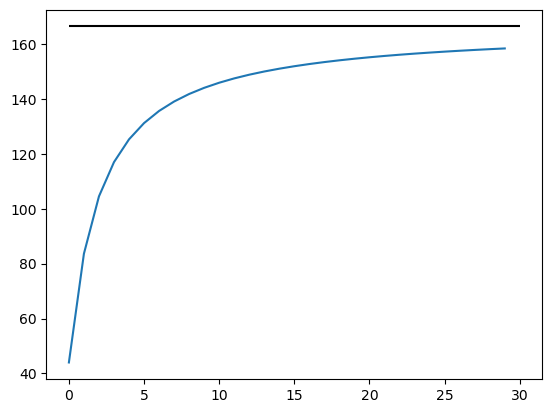

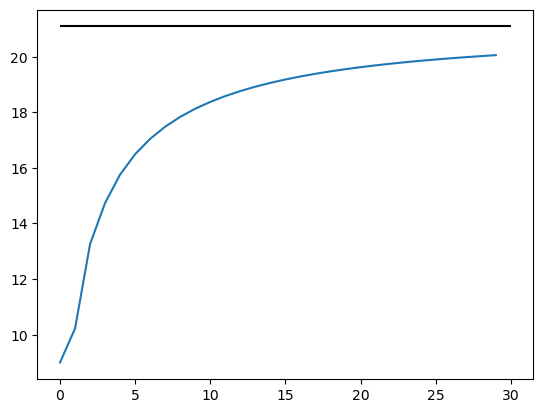

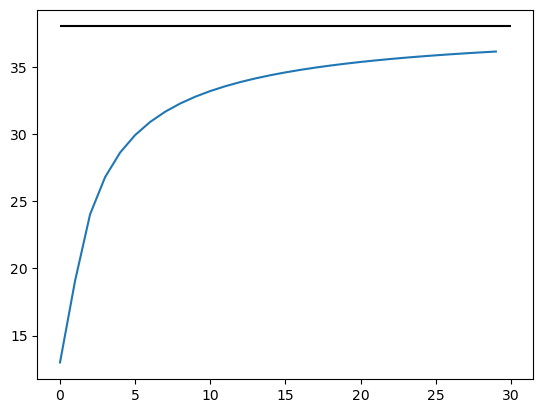

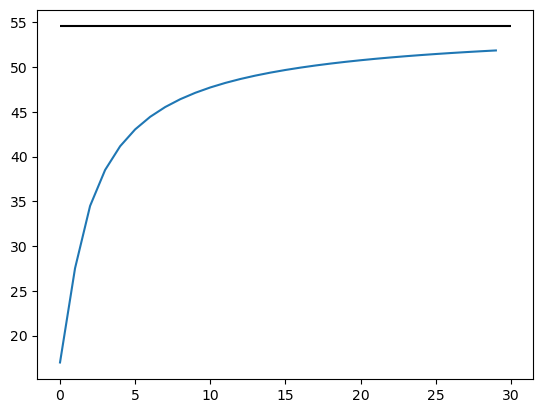

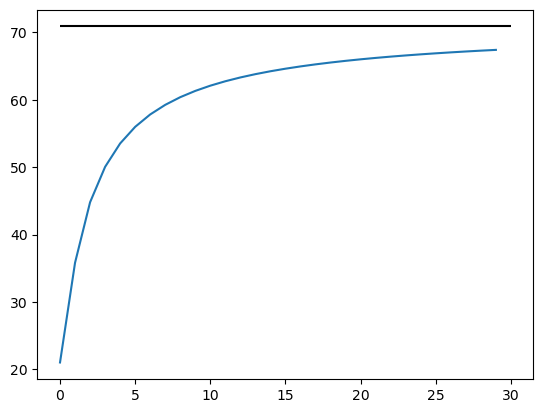

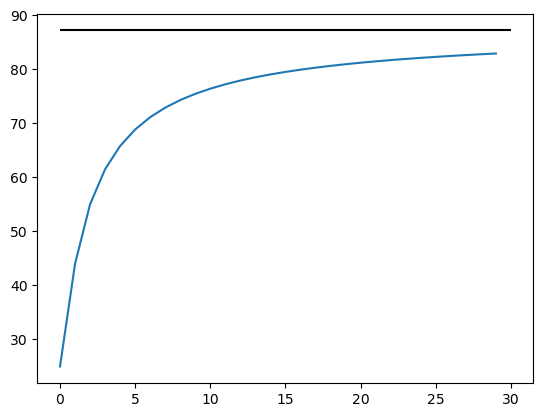

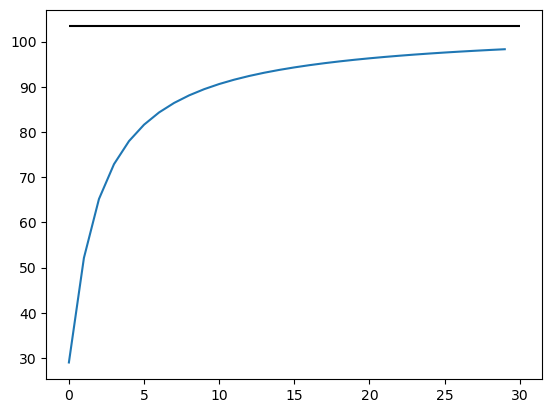

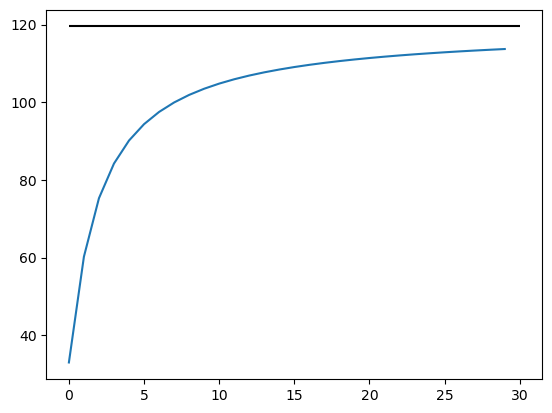

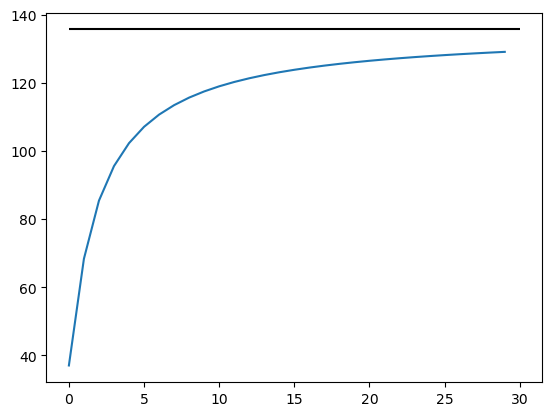

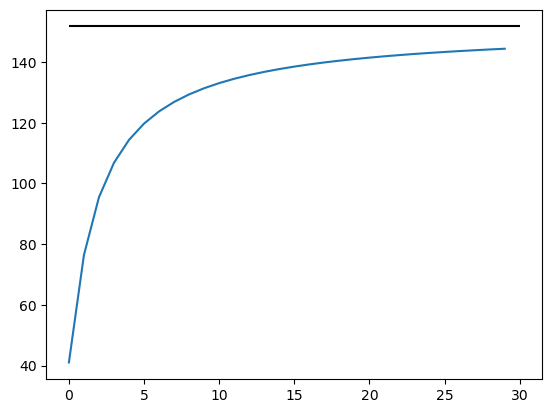

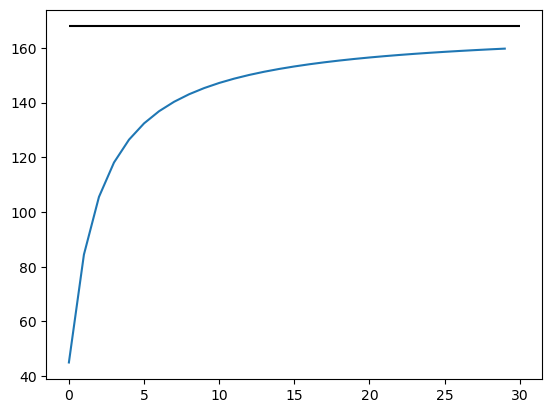

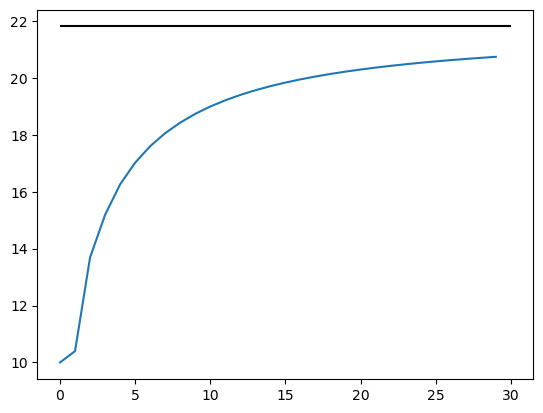

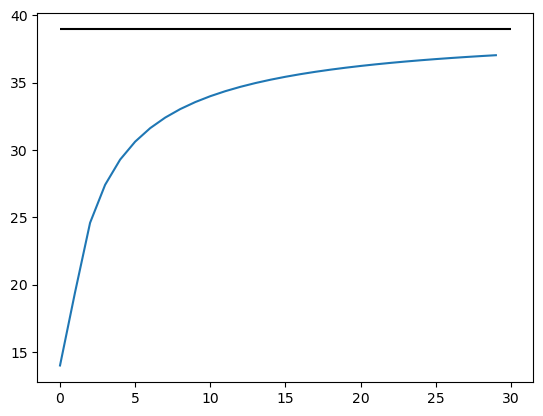

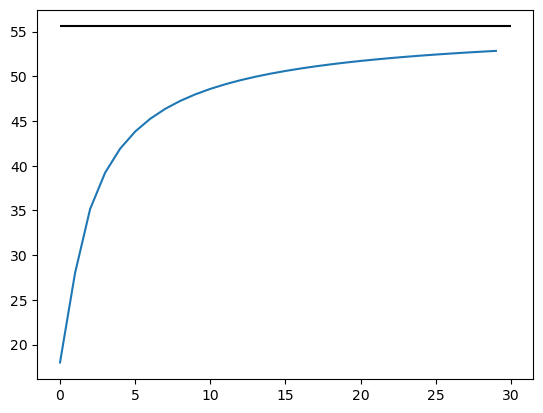

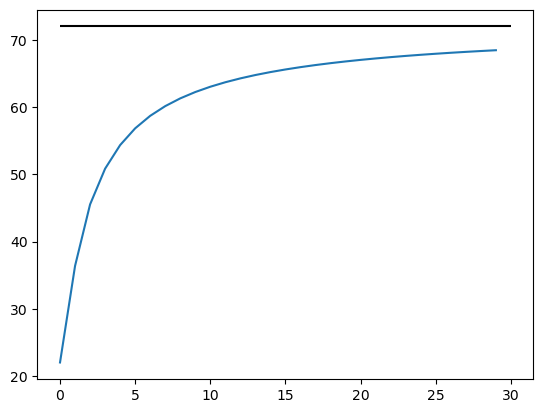

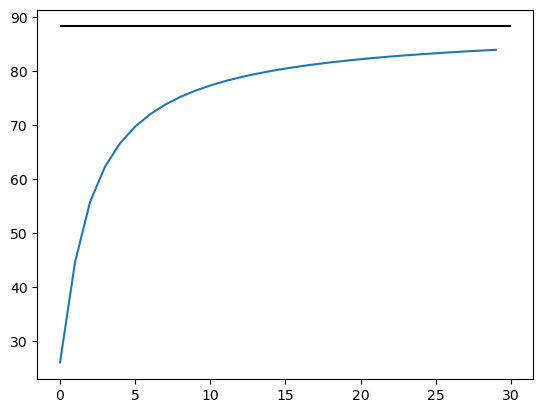

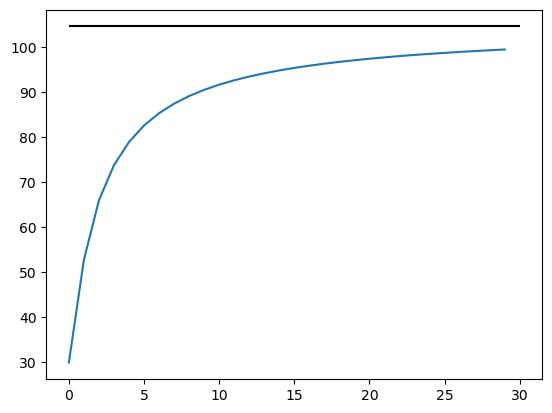

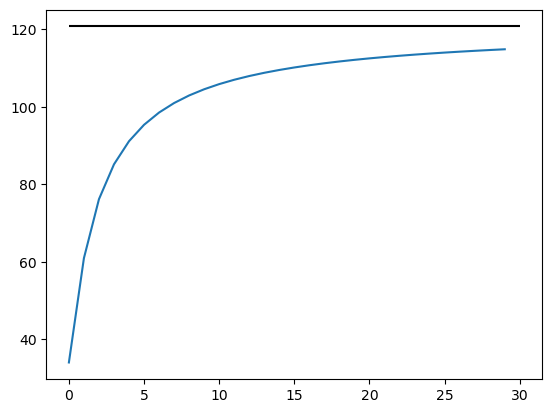

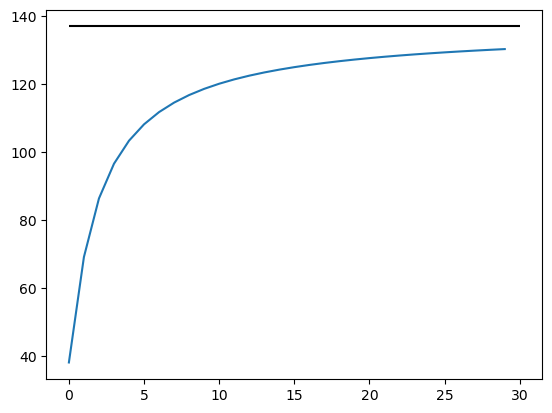

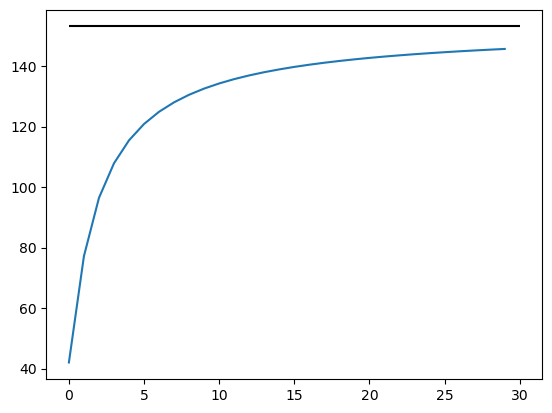

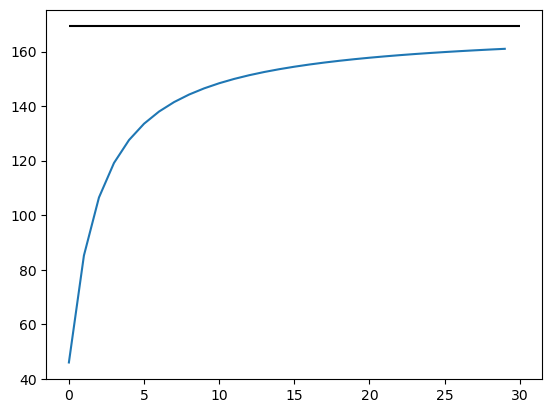

In [18]:
for K in range(1, 7):
    for N in range(1, 11):
        c_list_nkb = []
        for d_l in c_list:
            c_lnkb = d_l.subs(b, 4).subs(n, N).subs(k, K)
            c_list_nkb.append(c_lnkb)
        c_div = [float(c_list_nkb[i+1] / c_list_nkb[i]) for i in range(len(c_list_nkb)- 1)]
        plt.figure()
        plt.plot(c_div)
        x1b_abs = x1b.subs(k, K).subs(n, N).n()
        plt.hlines(1 / sympy.re(x1b_abs), 0, len(c_list) - 1, 'black')
        plt.show()

### Compute the approximate formula proven in Theorem 2.3

We use the first order approximation
$$c_l= x_1^{-l}v_0\frac{1}{2b\sqrt{4\pi (l+1)^3}}+ O(x_1^{-l}l^{-5/2}).$$
and the second order
$$c_l=\frac{1}{2bx_1^{l+1}}\left(v_0(\frac{1}{\sqrt{4\pi (l+1)^3}} + \frac{3}{8\sqrt{4\pi (l+1)^5}}) - v_1\frac{3}{4\sqrt{\pi (l+1)^5}}\right) + O(x_1^{-l}l^{-7/2})
$$

In [19]:
l = sympy.Symbol('l')
v0s = sympy.Symbol('v_0')
v1s = sympy.Symbol('v_1')
x1s = sympy.Symbol('x_1')
x2s = sympy.Symbol('x_2')
x3s = sympy.Symbol('x_3')
cl_approx1s = 1 / (2*b*x1s**(l+1)) * (v0s/(sympy.sqrt(4*sympy.pi*(l+1)**3)))
cl_approx1s

v_0*x_1**(-l - 1)/(4*sqrt(pi)*b*sqrt((l + 1)**3))

In [20]:
cl_approx2s = 1 / (2*b*x1s**(l+1)) * (v0s * (1 / sympy.sqrt(4*sympy.pi*(l+1)**3) + 3 / (8 * sympy.sqrt(4*sympy.pi*(l+1)**5)))-v1s*3/(4*sympy.sqrt(sympy.pi*(l+1)**5)))
cl_approx2s

x_1**(-l - 1)*(v_0*(3/(16*sqrt(pi)*sqrt((l + 1)**5)) + 1/(2*sqrt(pi)*sqrt((l + 1)**3))) - 3*v_1/(4*sqrt(pi)*sqrt((l + 1)**5)))/(2*b)

Furthermore, we have
$$v(z)=\frac{\sqrt{\mu(1-\frac{z}{x_2})(1-\frac{z}{x_3})}}{\sqrt{(1-2kz-4bnz-2kz\sqrt{1-4bzn})}}$$
with $\mu=-16k^2bnx_1x_2x_3$ and $v_0=v(x_1)$ and $v(1)=-x_1v'(x_1)$.

In [21]:
mus = sympy.Symbol('\mu')
v = sympy.sqrt(mus*(1-z/x2s)*(1-z/x3s)) / sympy.sqrt(p_alternative)
# v0 = mu*sympy.sqrt((1-x1s/x2s)*(1-x1s/x3s)) / sympy.sqrt(p_alternative.subs(z, x1s))
v

sqrt(\mu*(1 - z/x_2)*(1 - z/x_3))/sqrt(-4*b*n*z - 2*k*z*sqrt(-4*b*n*z + 1) - 2*k*z + 1)

In [22]:
mu = -16*k**2*b*n*x1s*x2s*x3s
mu

-16*b*k**2*n*x_1*x_2*x_3

In [23]:
v0 = v.subs(z, x1s)
v0

sqrt(\mu*(-x_1/x_2 + 1)*(-x_1/x_3 + 1))/sqrt(-4*b*n*x_1 - 2*k*x_1*sqrt(-4*b*n*x_1 + 1) - 2*k*x_1 + 1)

In [24]:
#
v1 = -x1s * v.diff(z).subs(z, x1s)
v1

-x_1*(sqrt(\mu*(-x_1/x_2 + 1)*(-x_1/x_3 + 1))*(-2*b*k*n*x_1/sqrt(-4*b*n*x_1 + 1) + 2*b*n + k*sqrt(-4*b*n*x_1 + 1) + k)/(-4*b*n*x_1 - 2*k*x_1*sqrt(-4*b*n*x_1 + 1) - 2*k*x_1 + 1)**(3/2) + sqrt(\mu*(-x_1/x_2 + 1)*(-x_1/x_3 + 1))*(-\mu*(-x_1/x_2 + 1)/(2*x_3) - \mu*(-x_1/x_3 + 1)/(2*x_2))/(\mu*(-x_1/x_2 + 1)*(-x_1/x_3 + 1)*sqrt(-4*b*n*x_1 - 2*k*x_1*sqrt(-4*b*n*x_1 + 1) - 2*k*x_1 + 1)))

In [25]:
cl_approx1 = cl_approx1s.subs(v0s, v0).subs(mus, mu).subs(x1s, x1).subs(x2s, x2).subs(x3s, x3)
c_list_approx1 = [cl_approx1.subs(l, l1) for l1 in range(len(c_list))]
cl_approx2 = cl_approx2s.subs(v1s, v1).subs(v0s, v0).subs(mus, mu).subs(x1s, x1).subs(x2s, x2).subs(x3s, x3)
c_list_approx2 = [cl_approx2.subs(l, l1) for l1 in range(len(c_list))]

In [68]:
K, N = 3, 5

c_list_approx1_nkb = [sympy.re(c_l.subs(b, 4).subs(n, N).subs(k, K).n()) for c_l in c_list_approx1] # Take the real part to get rid of ~i10^{-16}
c_list_approx2_nkb = [sympy.re(c_l.subs(b, 4).subs(n, N).subs(k, K).n()) for c_l in c_list_approx2] # Take the real part to get rid of ~i10^{-16}
c_list_empiric_nkb = [c_l.subs(b, 4).subs(n, N).subs(k, K) for c_l in c_list]

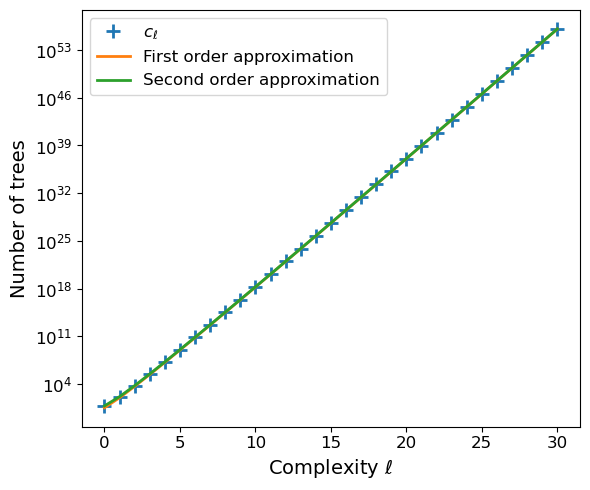

In [135]:
fontsize = 14
linewidth = 2.0
markersize = 10

plt.figure(figsize=(6, 5))
plt.plot(c_list_empiric_nkb, '+', label='$c_\ell$', markersize=markersize, linewidth=linewidth, markeredgewidth=linewidth)
plt.plot(c_list_approx1_nkb, label='First order approximation', linewidth=linewidth)
plt.plot(c_list_approx2_nkb, label='Second order approximation', linewidth=linewidth)
plt.yscale('log')
plt.legend(prop={'size': fontsize-2})
plt.xlabel('Complexity $\ell$', fontsize=fontsize)
plt.ylabel('Number of trees', fontsize=fontsize)
plt.xticks(fontsize=fontsize-2)
plt.yticks(fontsize=fontsize-2)
plt.tight_layout()
plt.savefig('cl.pdf')
plt.show()

## Approximation of $d_l$ 


### Start with testing the approximation from "Deep Learning for Symbolic Mathematics"
The approximation we use from Deep Learning for Symbolic Mathematics is
$$d_l\approx\frac{\sqrt{\delta}r_2^{-l-1/2}}{2b\sqrt{2\pi kl^3}}$$
with 
$$\delta=\sqrt{k^2+4b^2n^2+4bkn-k}$$
and 
$$r_2=\frac{k}{k+2bn+\delta}.$$


In [40]:
delta = sympy.sqrt(k**2+4*b**2*n**2+4*b*k*n-k)
delta

sqrt(4*b**2*n**2 + 4*b*k*n + k**2 - k)

In [41]:
r2 = k / (k+2*b*n+delta)
r2

k/(2*b*n + k + sqrt(4*b**2*n**2 + 4*b*k*n + k**2 - k))

In [42]:
B, K, N = 4,1,1
(r2)**(-n-1/2).subs(b, B).subs(k, K).subs(n, N).n()

(k/(2*b*n + k + sqrt(4*b**2*n**2 + 4*b*k*n + k**2 - k)))**(-1.5)

In [43]:
def d(l, B, K, N):
    dl = (sympy.sqrt(delta) * r2 ** (-l-1/2)) / (2 * b * sympy.sqrt(2 * sympy.pi * k * l**3))
    return dl.subs(b, B).subs(k, K).subs(n, N)
B, K, N = 4, 1, 1
d_list_formula = [d(l, B, K, N).n() for l in range(30)]

Check this computation by empirically by using the formula:
$$d_l=kd_{l-1}+b\sum_{l_1=0}^{l-1}d_{l_1}d_{l-l_1-1}\text{, for }l>0\text{, }d_0=n$$

In [44]:
def step_d(b, k, d_list):
    d_l = 0
    for i in range(len(d_list)):
        d_l += d_list[i] * d_list[len(d_list) - i - 1]
    d_l *= b
    d_l += k*d_list[len(d_list) - 1] 
    d_list.append(sympy.expand(d_l))
    
def compute_dl(b, k, l):
    d_list = [n]
    for _ in range(l):
        step_d(b, k, d_list)
    return d_list
d_list_empiric = compute_dl(b, k, 30)

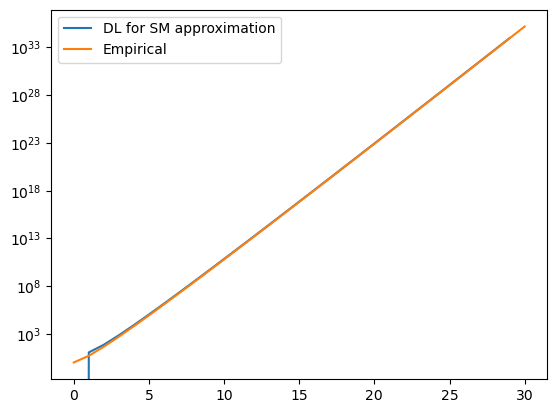

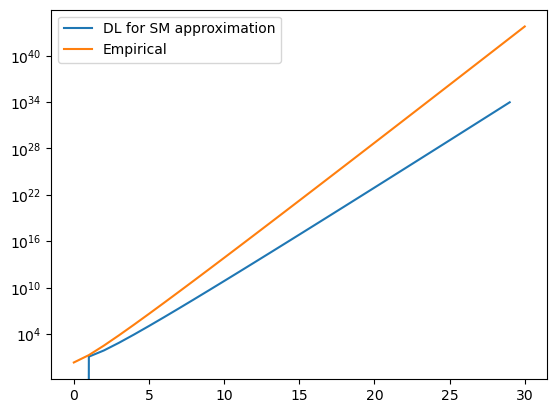

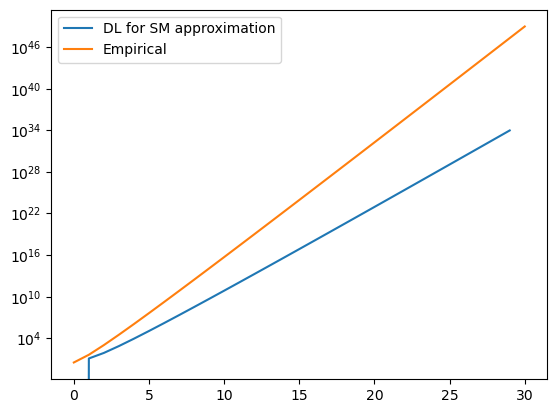

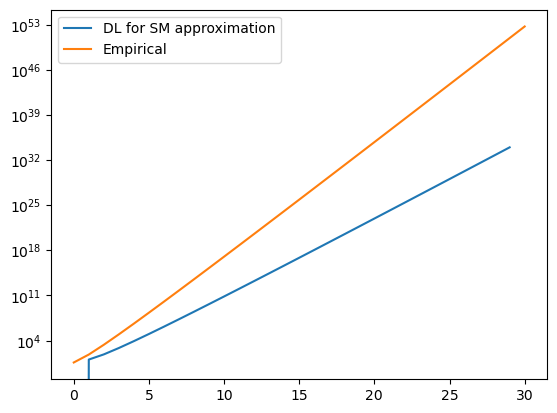

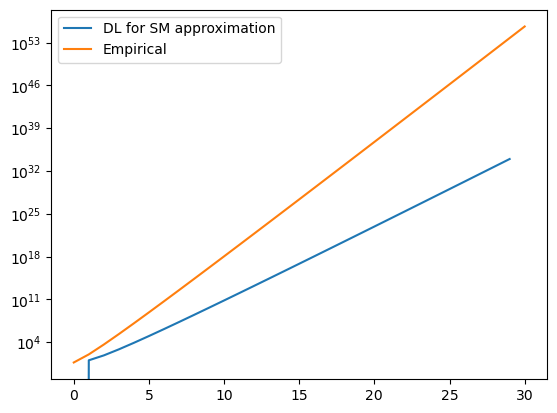

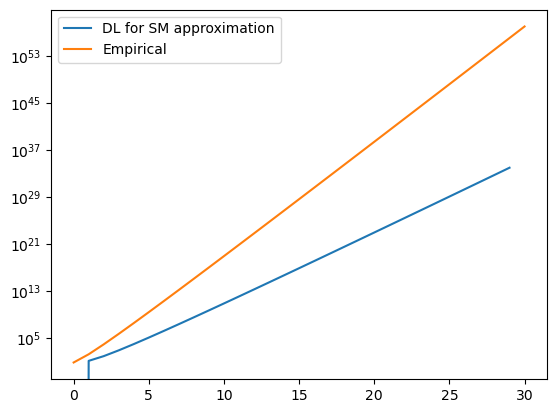

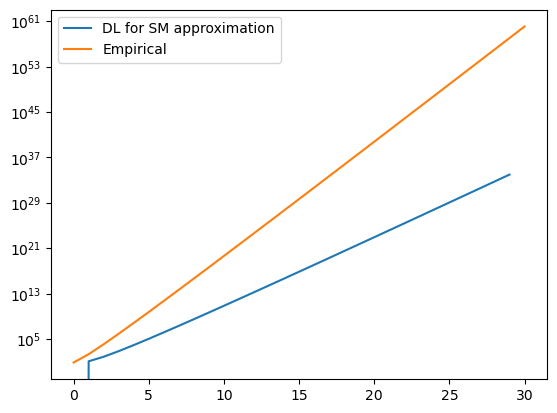

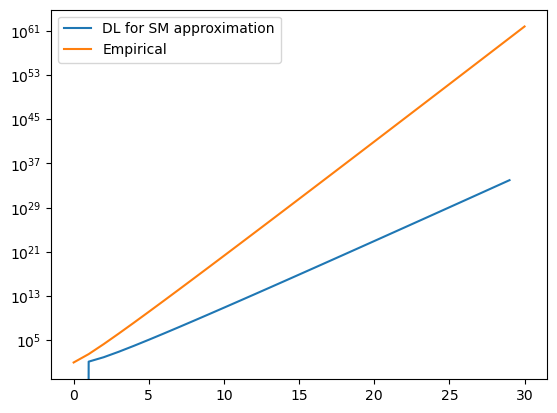

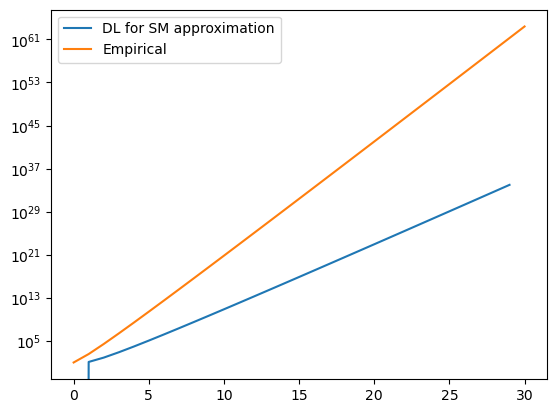

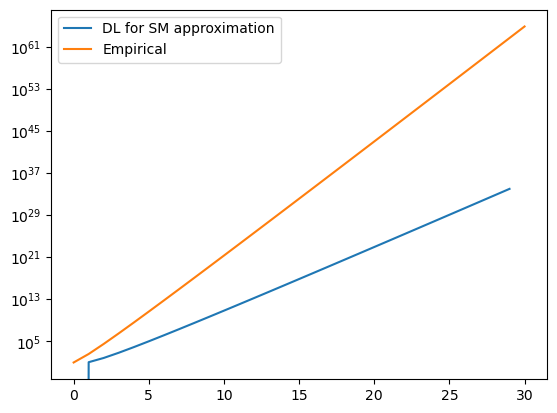

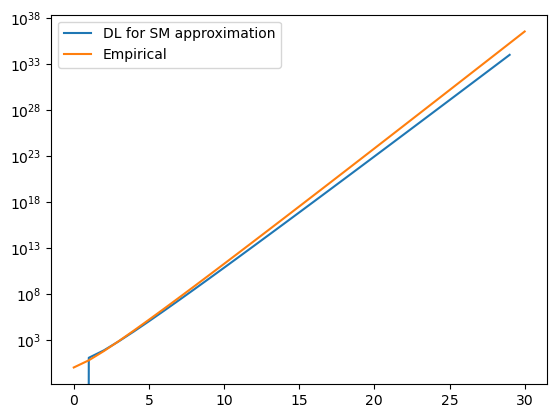

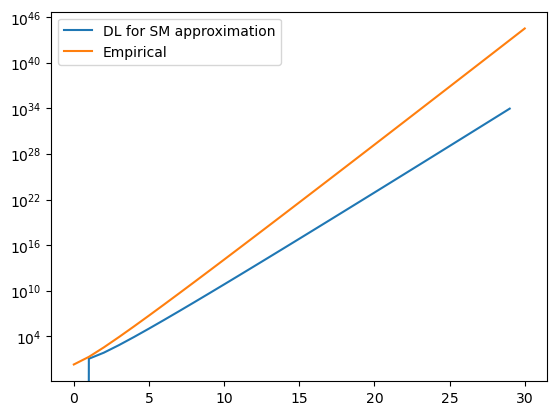

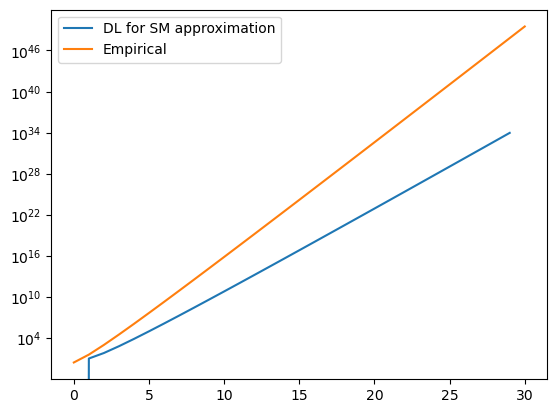

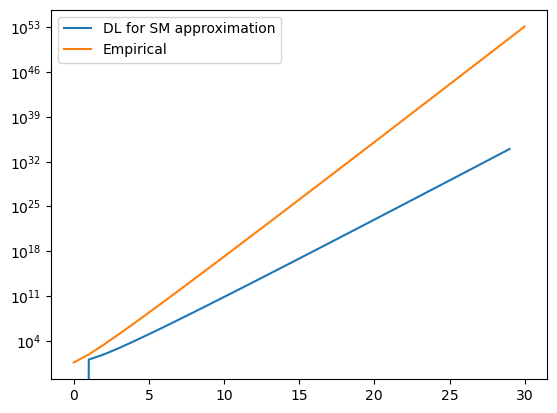

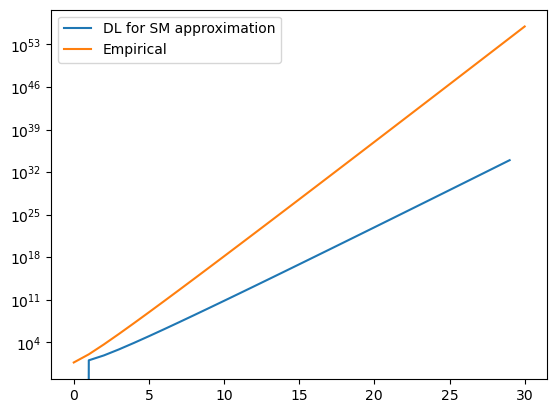

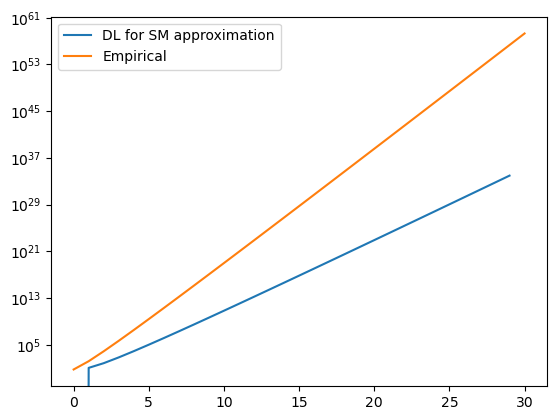

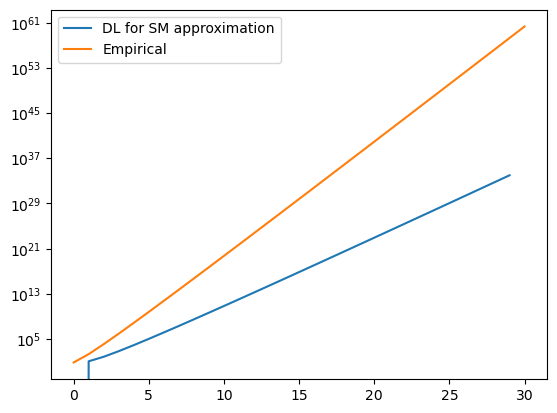

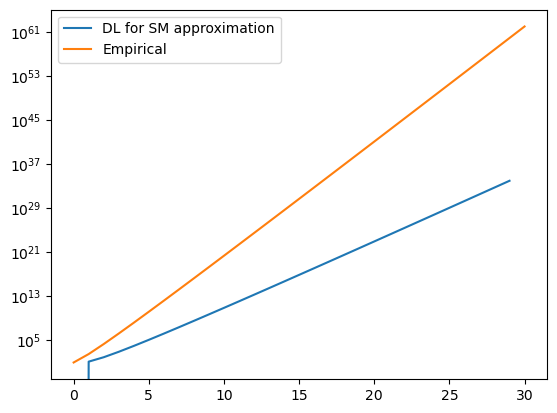

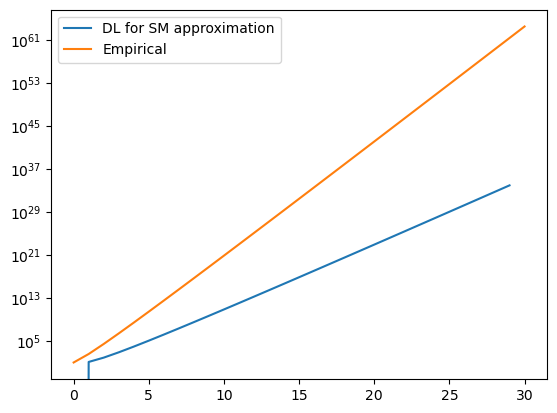

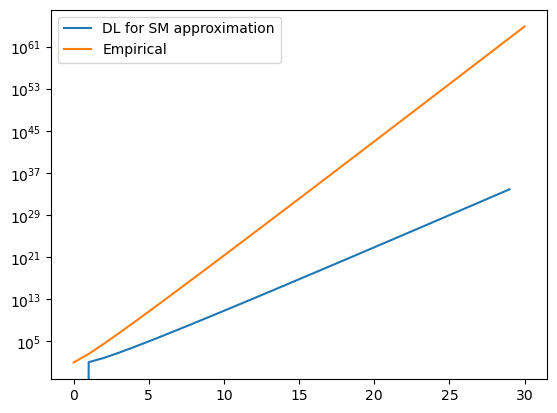

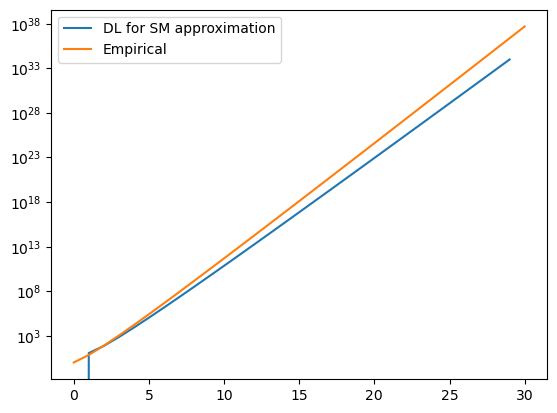

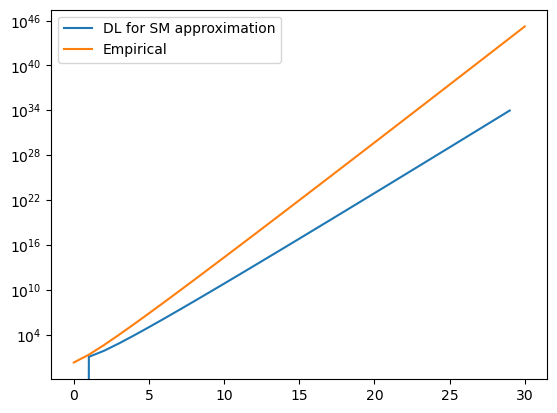

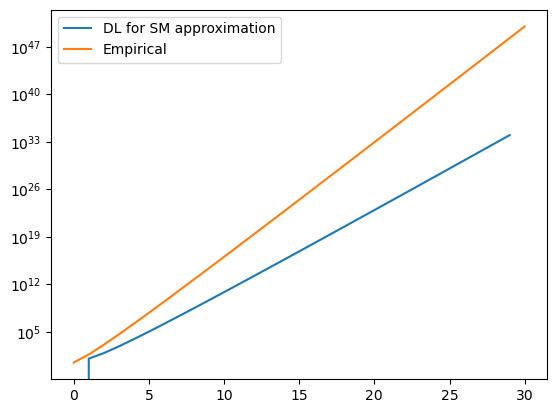

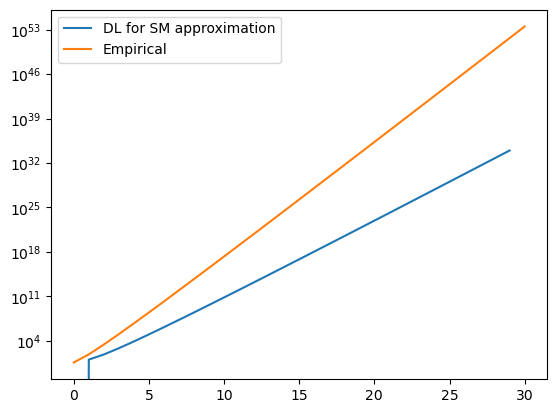

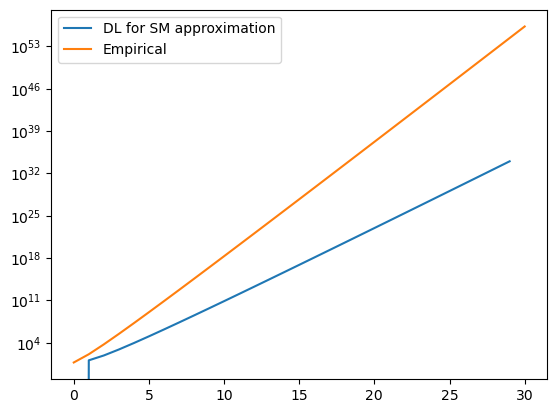

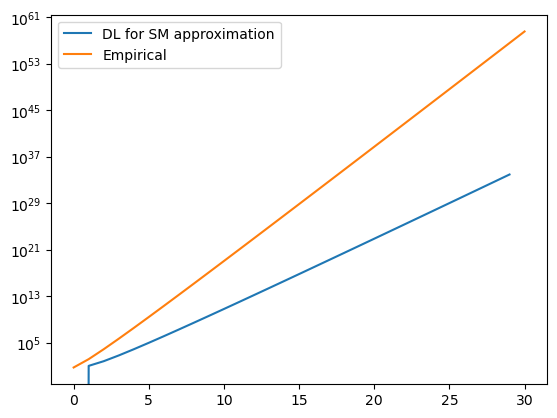

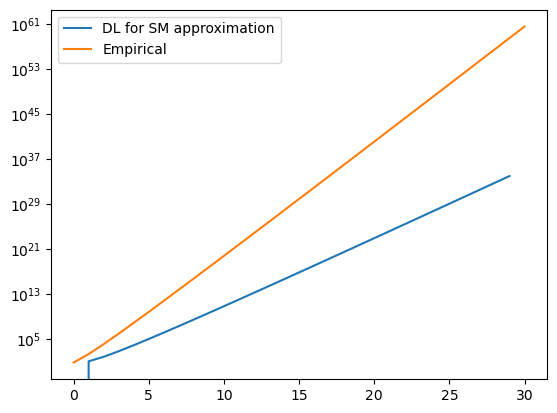

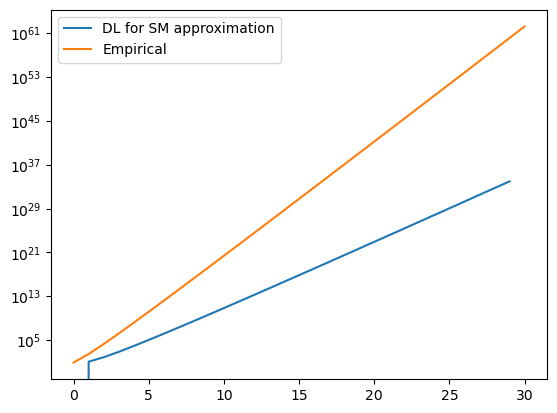

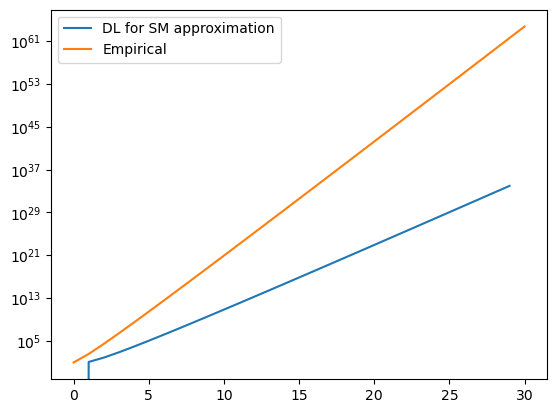

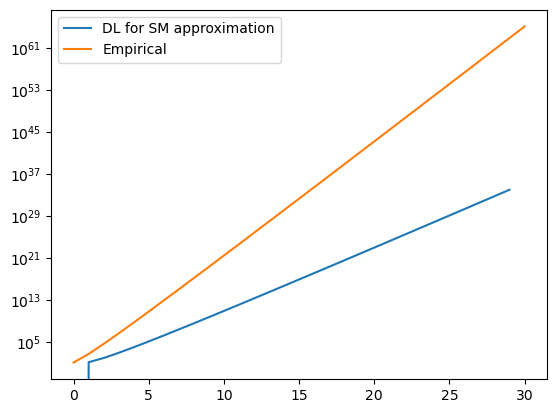

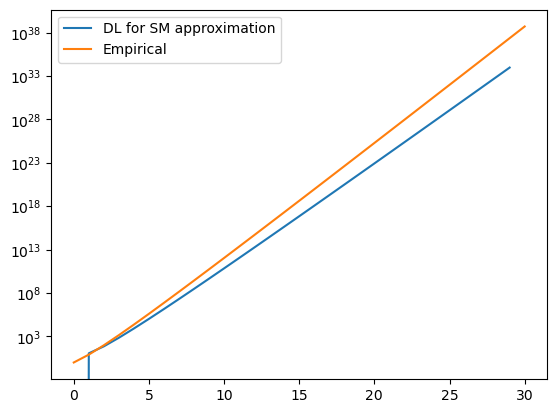

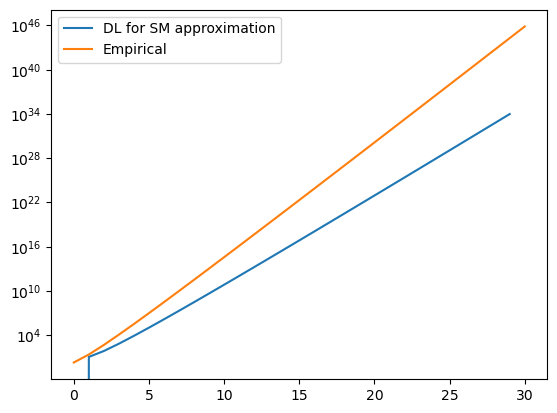

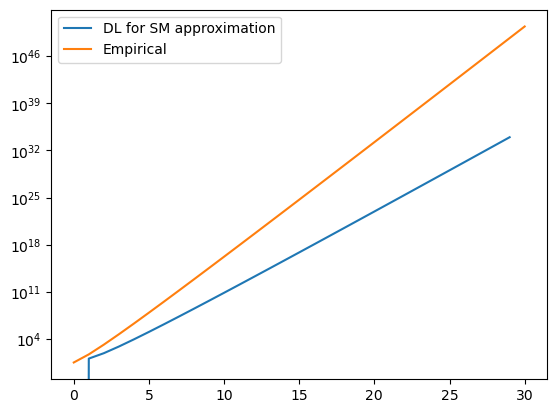

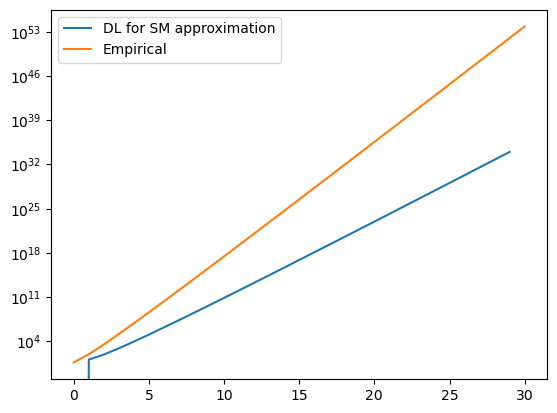

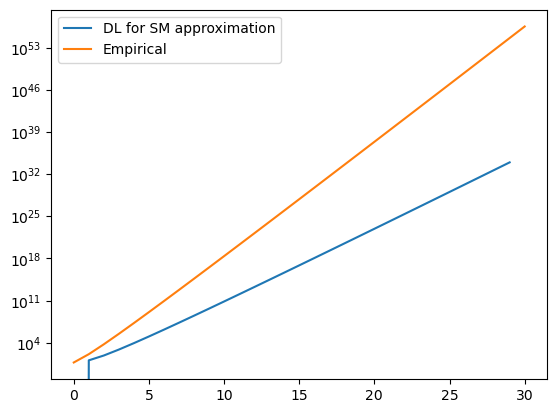

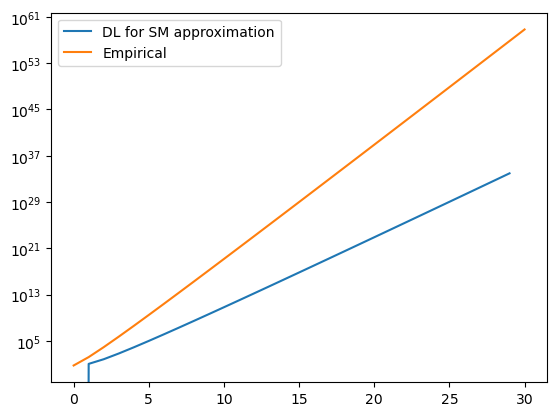

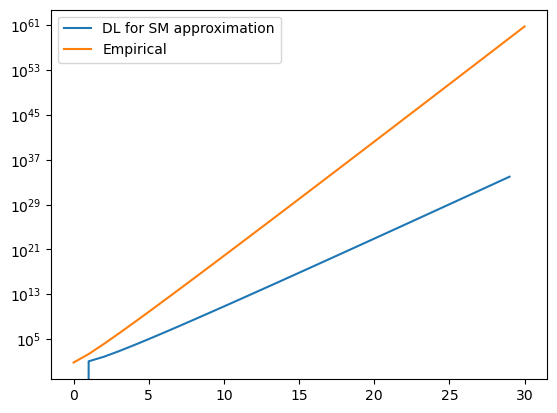

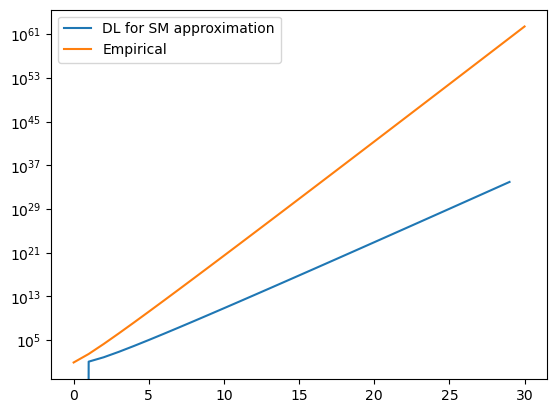

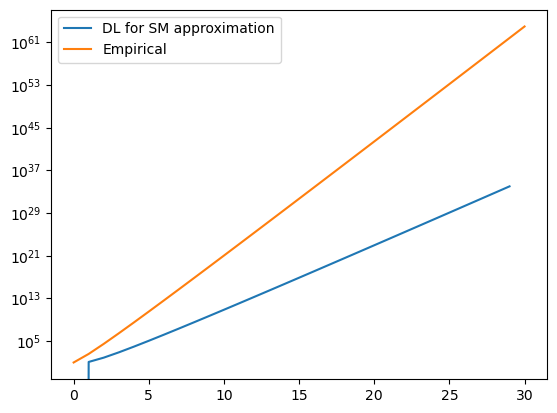

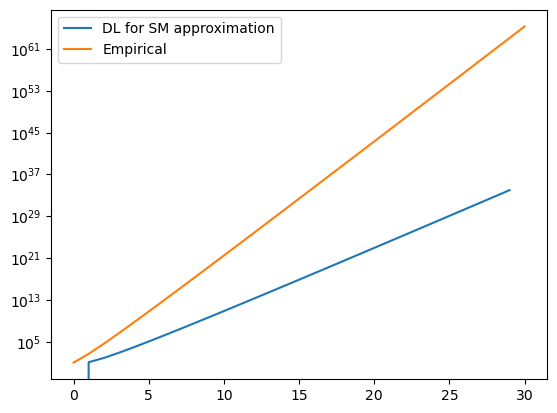

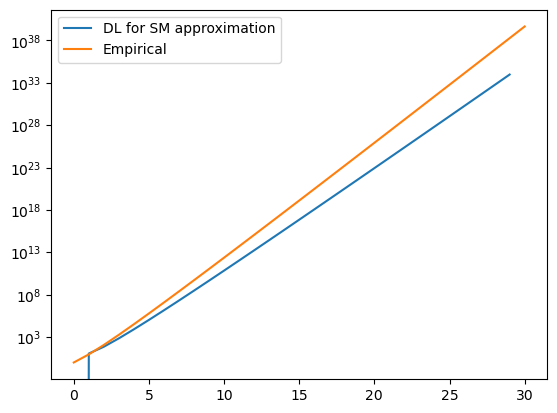

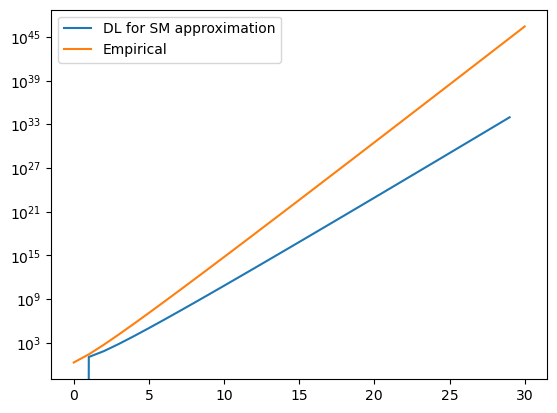

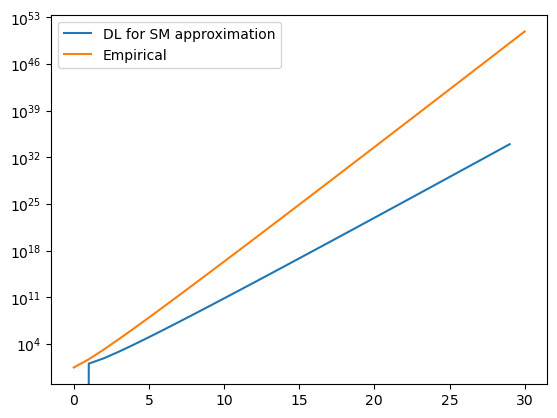

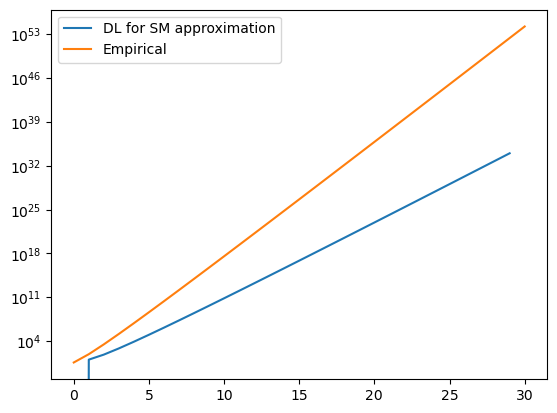

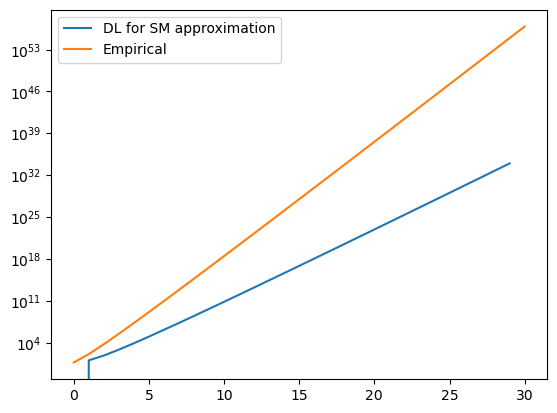

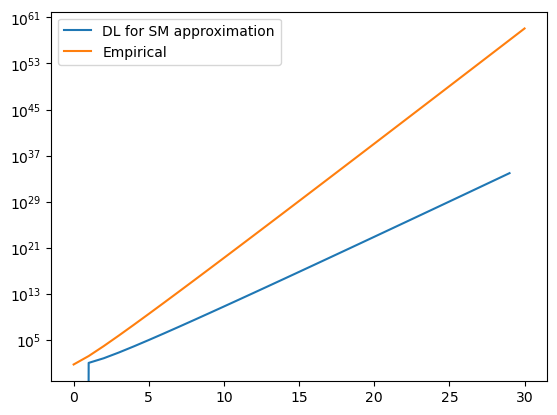

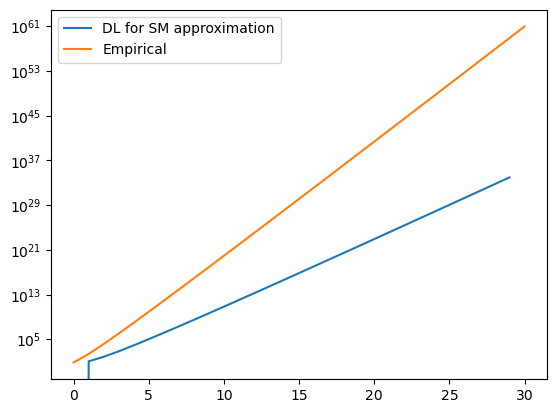

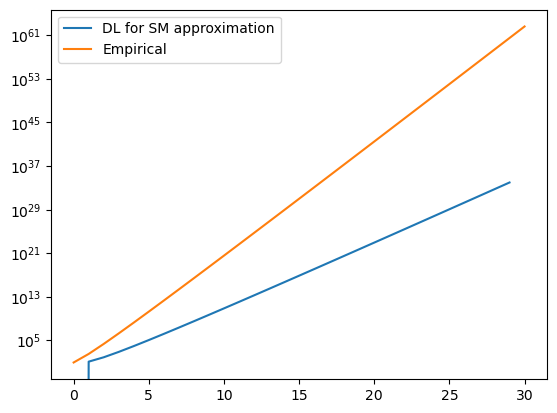

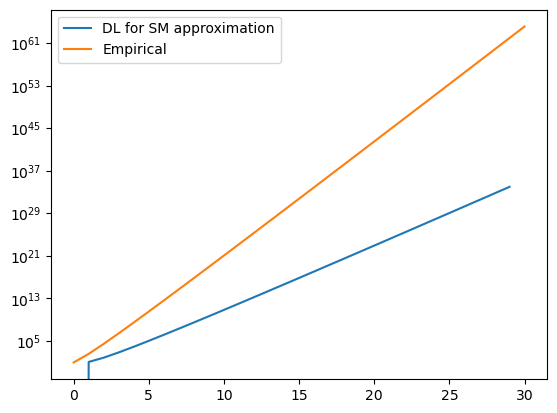

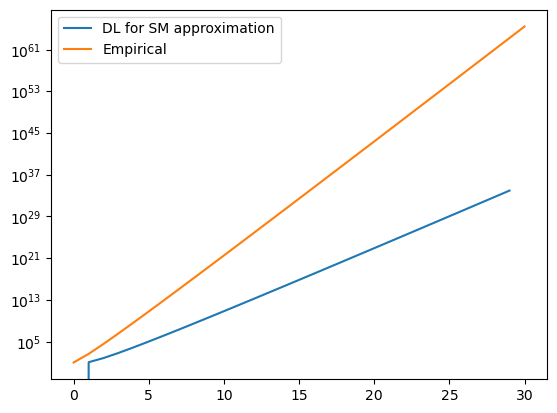

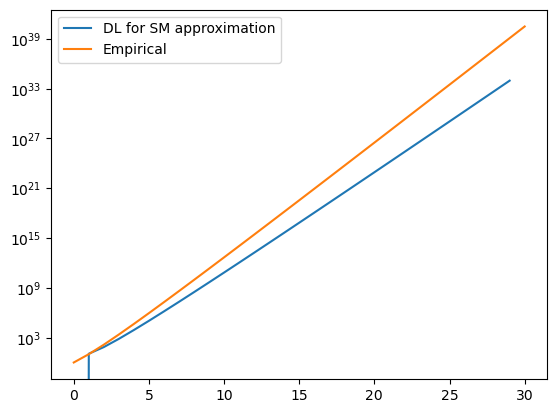

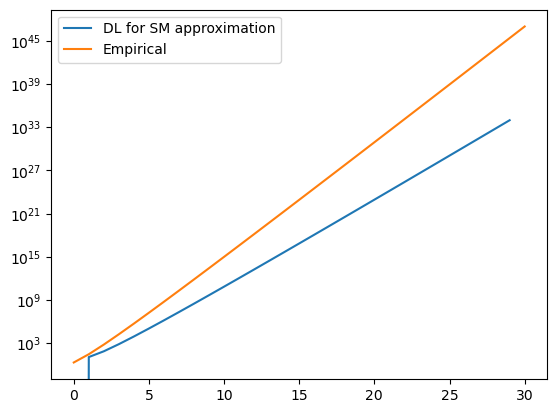

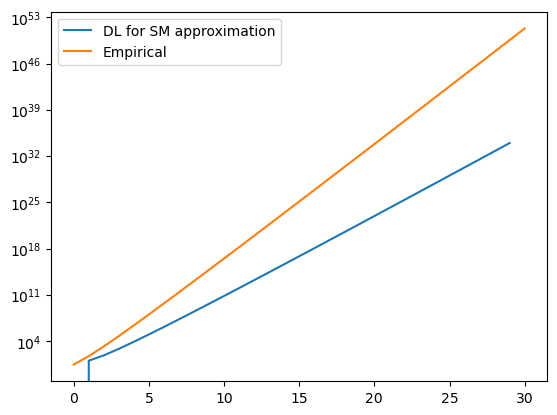

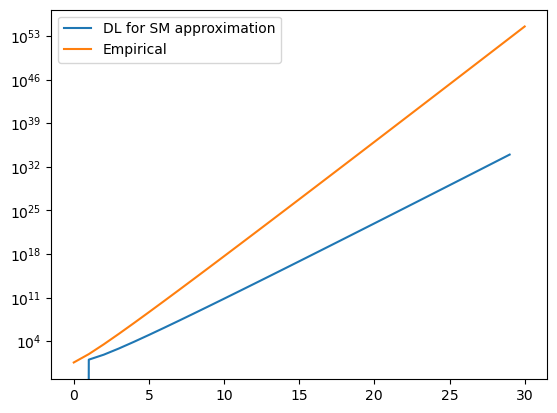

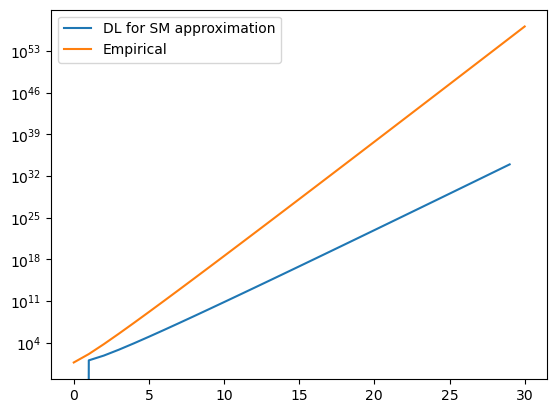

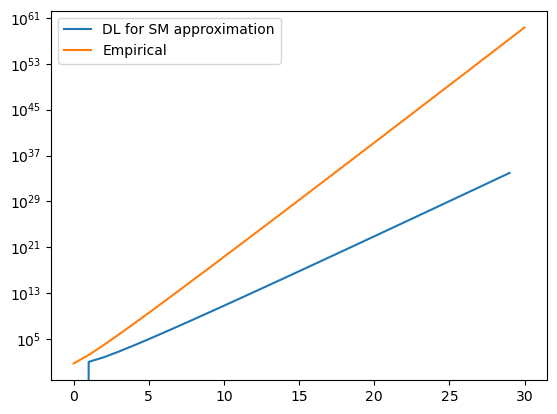

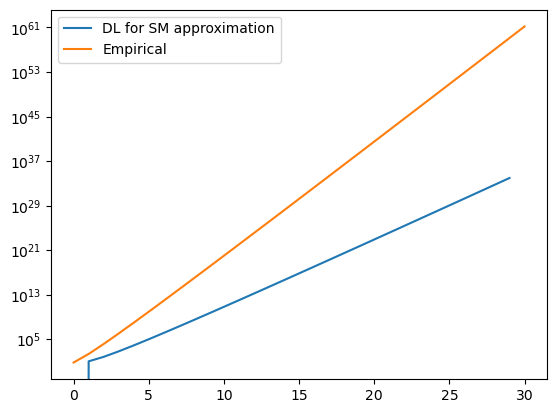

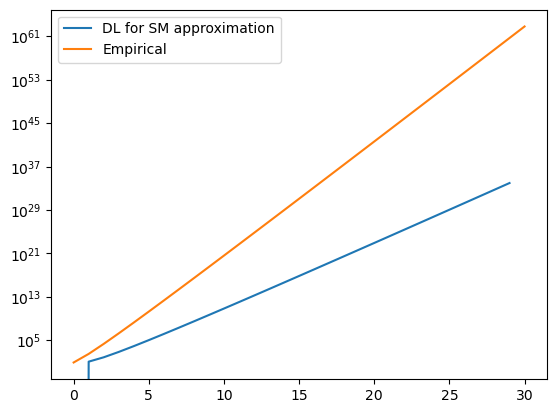

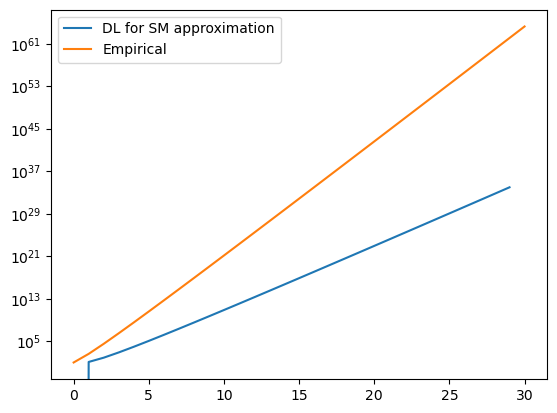

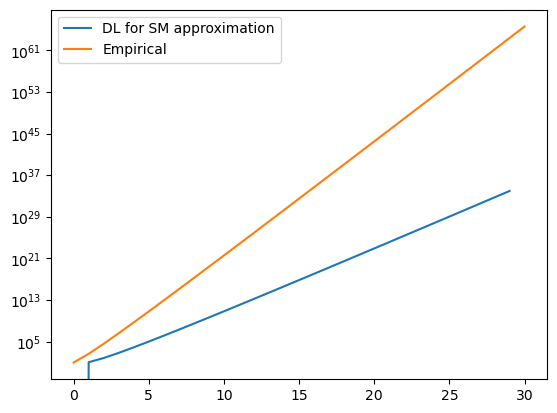

In [45]:
for K in range(1, 7):
    for N in range(1, 11):
        d_list_formula_nkb = [d_l.subs(b, 4).subs(n, N).subs(k, K) for d_l in d_list_formula]
        d_list_formula_nkb[0] = 0 # gets zoo as the first value
        d_list_empiric_nkb = [d_l.subs(b, 4).subs(n, N).subs(k, K) for d_l in d_list_empiric]

        plt.figure()
        plt.plot(d_list_formula_nkb, label='DL for SM approximation')
        plt.plot(d_list_empiric_nkb, label='Empirical')
        plt.yscale('log')
        plt.legend()
        plt.show()

These are somehow disconnected; what is wrong? First, let us check if our empirical formula and theirs give the same results:
$$d_l= \sum_{l_2=0}^l\binom{l+l_2}{2l_2}b_{l_2}b^{l_2}k^{l-l_2}n^{l_2+1}$$

In [46]:
def step_d_dlsm(b, k, d_list, b_list):
    d_l = 0
    for l2 in range(len(d_list) + 1): # we want to sum from 0,...,l (and not just until l-1)
        summand = 0
        summand += sympy.binomial(len(d_list) + l2, 2*l2) # len(d_list) = l, since it holds d_0, ..., d_{l-1}
        summand *= b_list[l2].subs(b, 1).subs(n, 1)
        summand *= b**l2
        summand *= k**(len(d_list)-l2)
        summand *= n**(l2+1)
        d_l += summand
    d_list.append(d_l)
    
def compute_d_dlsm(b, k, l):
    b_list = compute_bl(b, l)
    d_list = [n]
    for i in range(l):
        step_d_dlsm(b, k, d_list, b_list)
    return b_list, d_list
b_list, d_list_empiric_dlsm = compute_d_dlsm(b, k, 10)

In [47]:
# This shows that their formula and our formula are equivalent (and hence probably correct)
d_list_empiric = [sympy.expand(dl) for dl in d_list_empiric]
d_list_empiric[:11], d_list_empiric_dlsm

([n,
  b*n**2 + k*n,
  2*b**2*n**3 + 3*b*k*n**2 + k**2*n,
  5*b**3*n**4 + 10*b**2*k*n**3 + 6*b*k**2*n**2 + k**3*n,
  14*b**4*n**5 + 35*b**3*k*n**4 + 30*b**2*k**2*n**3 + 10*b*k**3*n**2 + k**4*n,
  42*b**5*n**6 + 126*b**4*k*n**5 + 140*b**3*k**2*n**4 + 70*b**2*k**3*n**3 + 15*b*k**4*n**2 + k**5*n,
  132*b**6*n**7 + 462*b**5*k*n**6 + 630*b**4*k**2*n**5 + 420*b**3*k**3*n**4 + 140*b**2*k**4*n**3 + 21*b*k**5*n**2 + k**6*n,
  429*b**7*n**8 + 1716*b**6*k*n**7 + 2772*b**5*k**2*n**6 + 2310*b**4*k**3*n**5 + 1050*b**3*k**4*n**4 + 252*b**2*k**5*n**3 + 28*b*k**6*n**2 + k**7*n,
  1430*b**8*n**9 + 6435*b**7*k*n**8 + 12012*b**6*k**2*n**7 + 12012*b**5*k**3*n**6 + 6930*b**4*k**4*n**5 + 2310*b**3*k**5*n**4 + 420*b**2*k**6*n**3 + 36*b*k**7*n**2 + k**8*n,
  4862*b**9*n**10 + 24310*b**8*k*n**9 + 51480*b**7*k**2*n**8 + 60060*b**6*k**3*n**7 + 42042*b**5*k**4*n**6 + 18018*b**4*k**5*n**5 + 4620*b**3*k**6*n**4 + 660*b**2*k**7*n**3 + 45*b*k**8*n**2 + k**9*n,
  16796*b**10*n**11 + 92378*b**9*k*n**10 + 218790*b**8*k**

### Simple approximation based on the singularities
Since there are mistakes in the singularities of the generating function done by "Deep Learning for Symbolic Mathematics", we now check the upper bound computed ourselves:
$$r_2=\frac{k+2bn-\sqrt{4b^2n^2+4bkn}}{k^2}$$
which is always positive.

In [48]:
r2 = (k+2*b*n-sympy.sqrt(4*b**2*n**2+4*b*k*n)) / (k**2)
r2

(2*b*n + k - sqrt(4*b**2*n**2 + 4*b*k*n))/k**2

In [49]:
r2b = r2.subs(b, 4)
r2b

(k + 8*n - sqrt(16*k*n + 64*n**2))/k**2

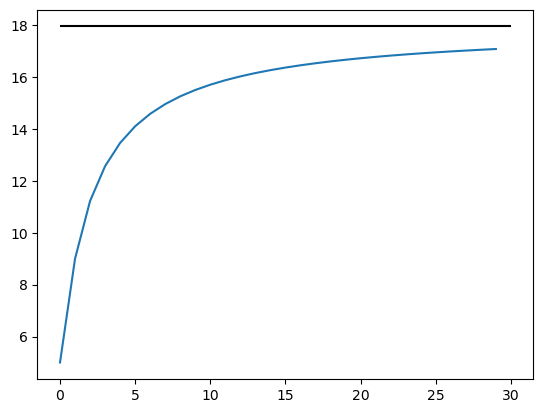

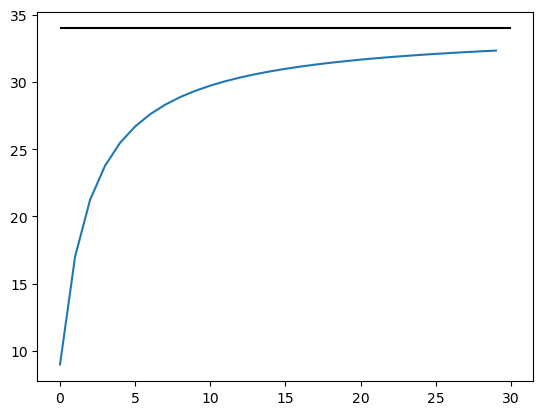

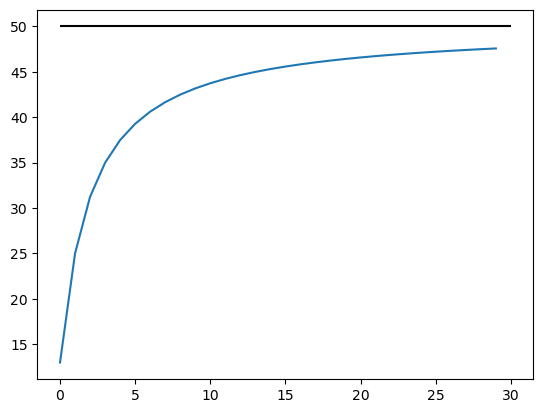

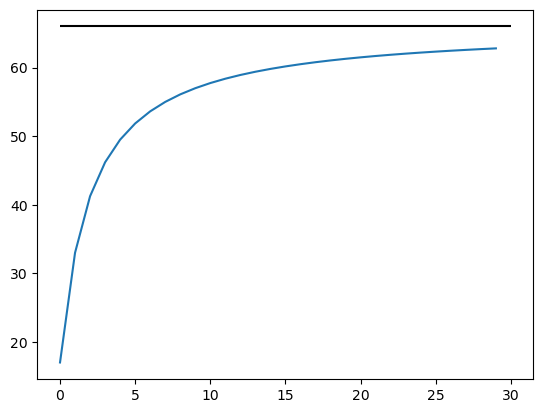

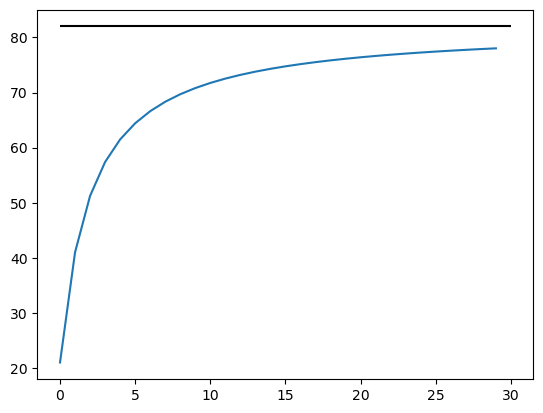

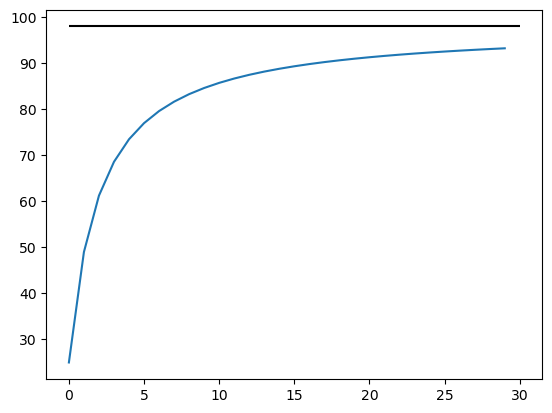

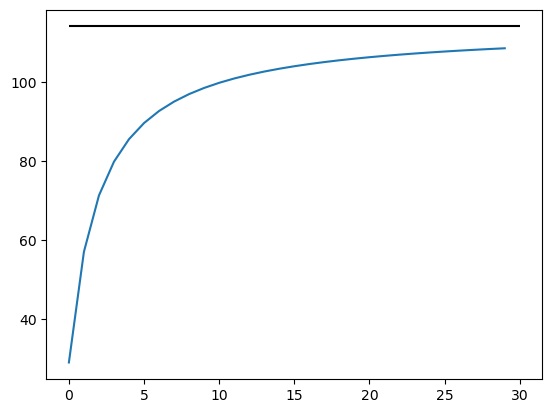

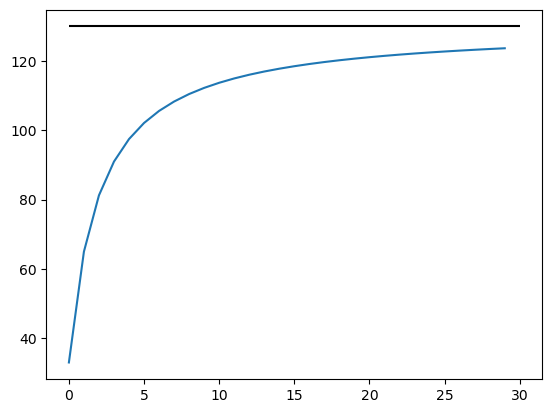

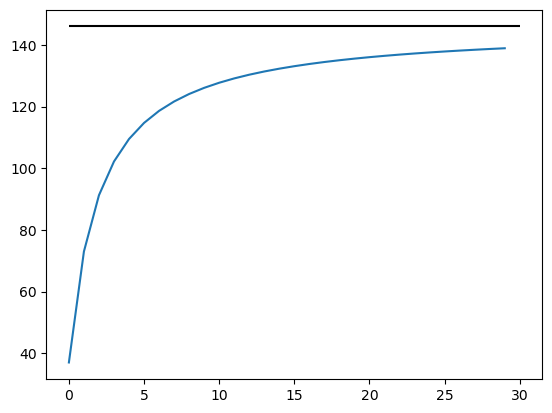

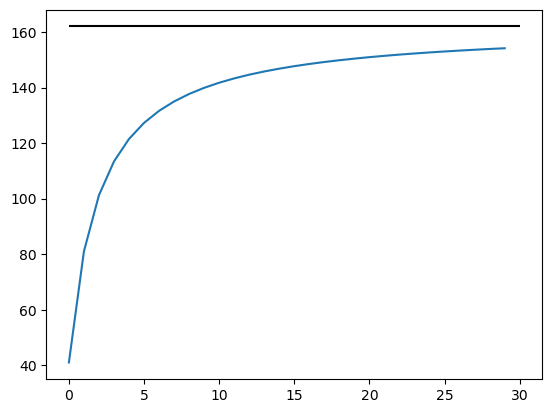

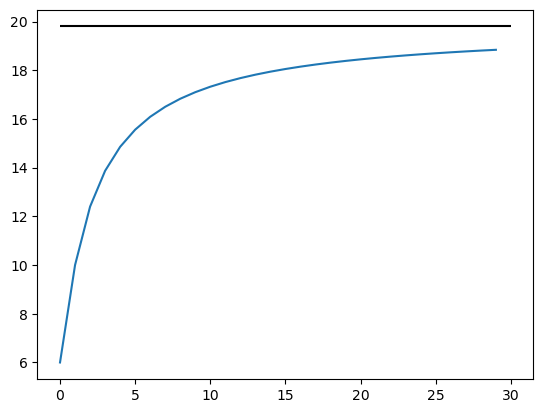

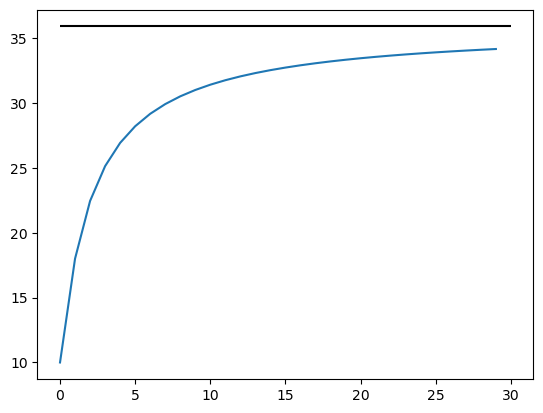

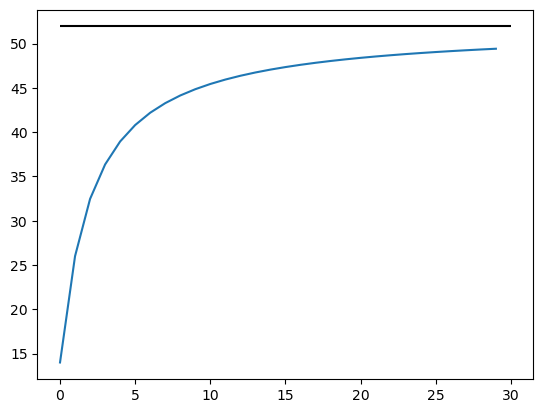

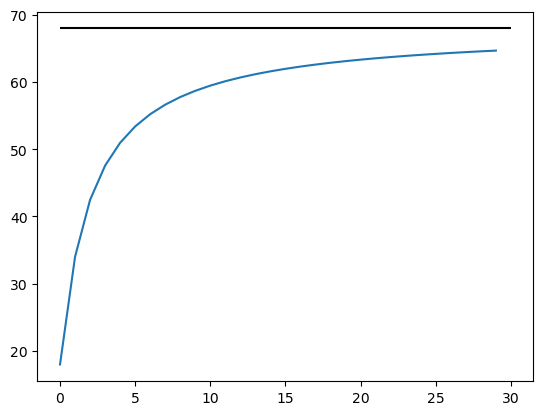

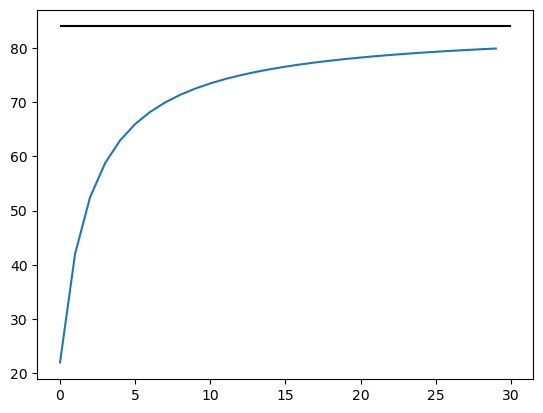

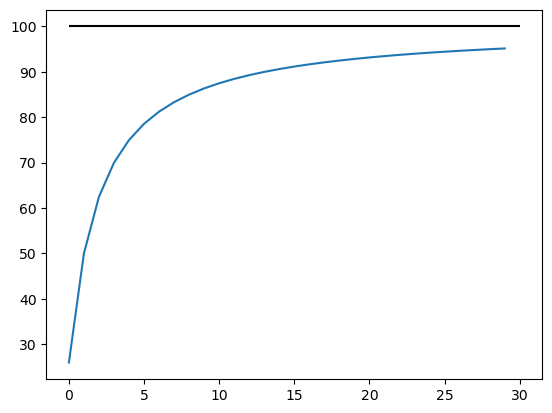

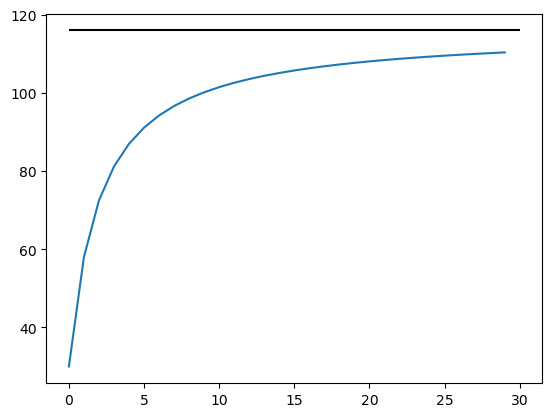

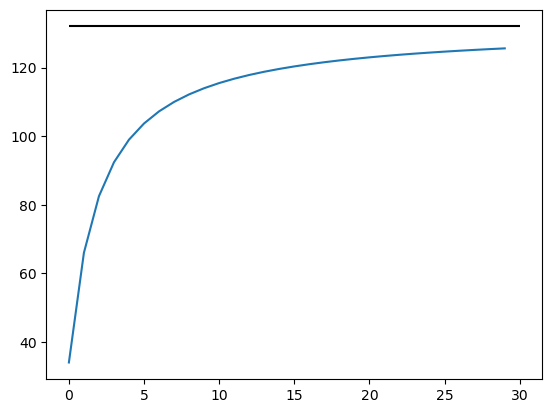

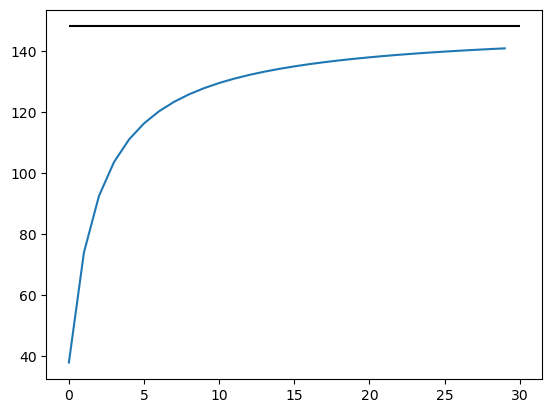

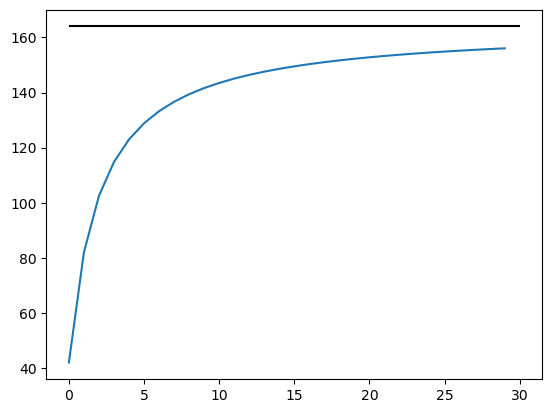

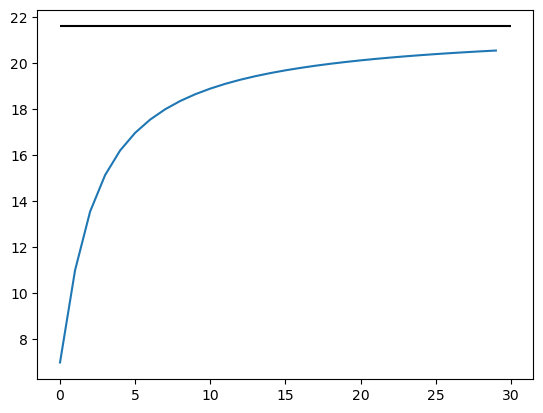

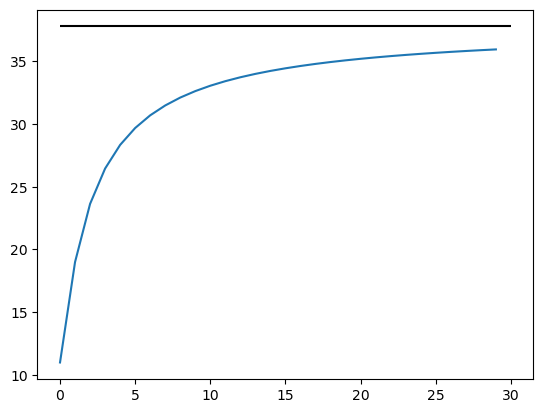

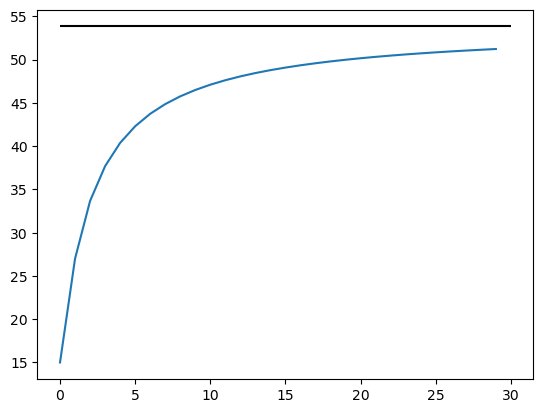

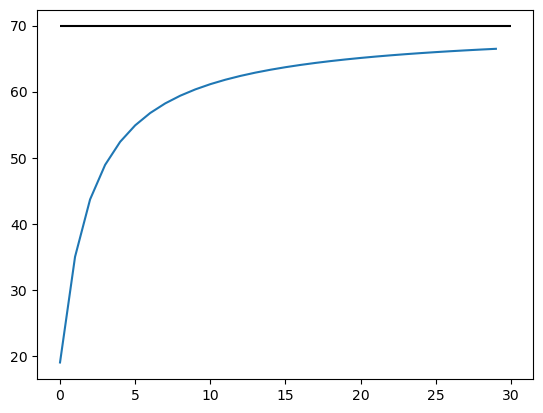

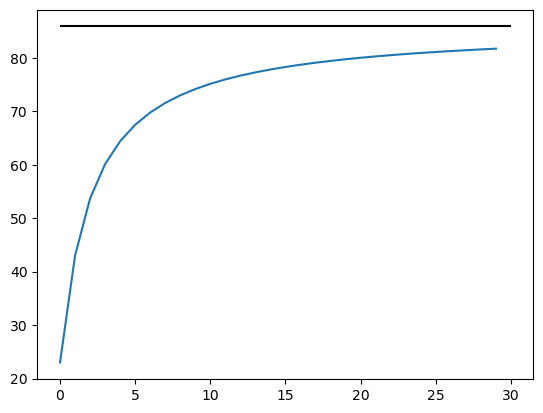

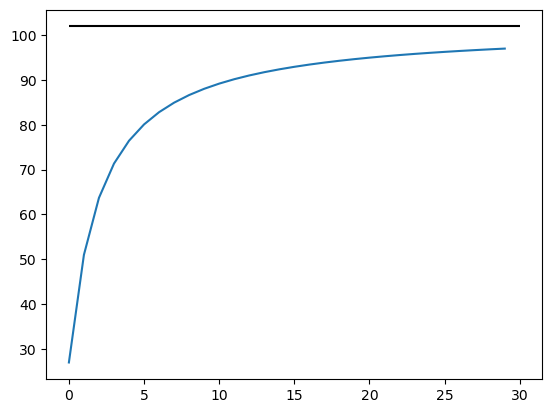

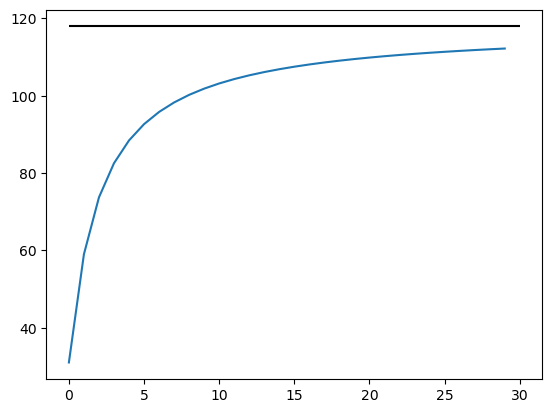

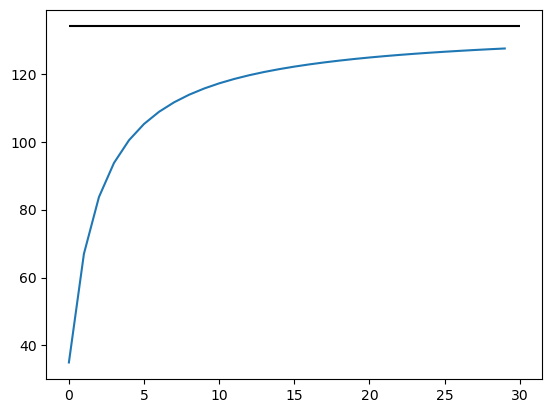

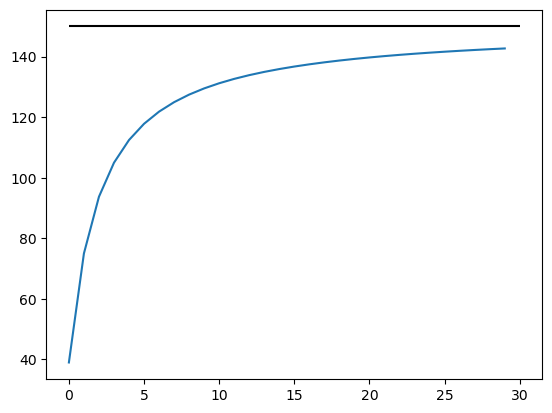

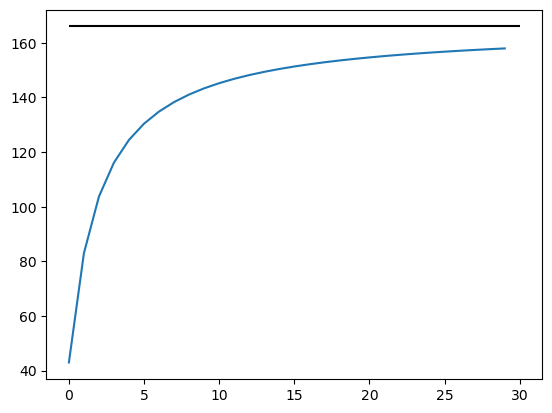

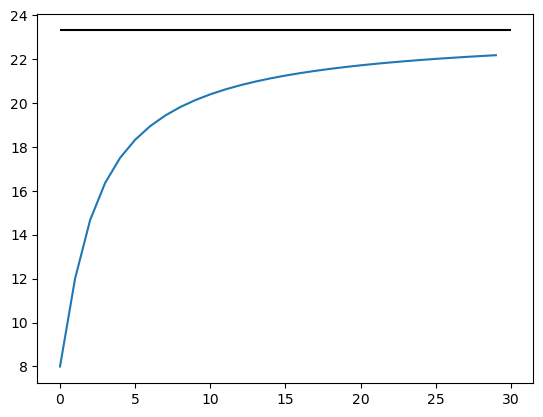

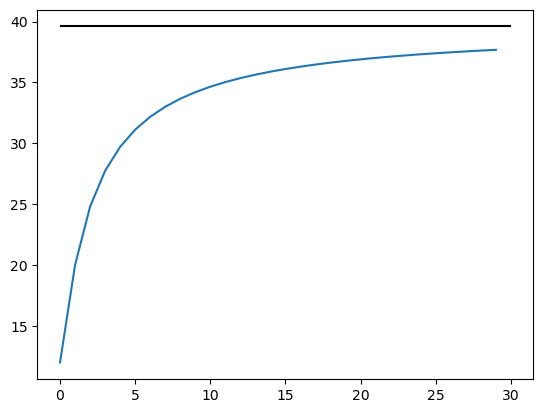

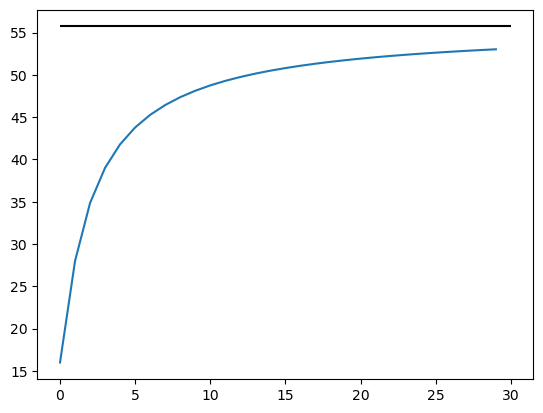

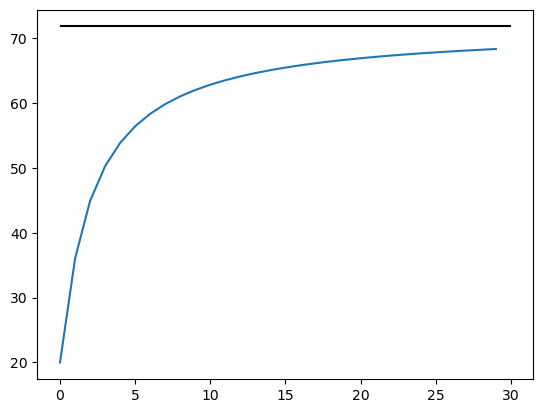

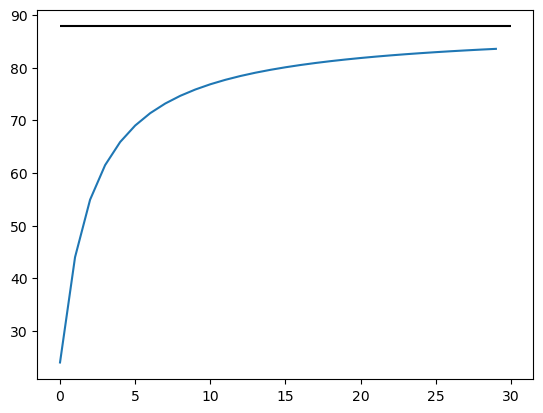

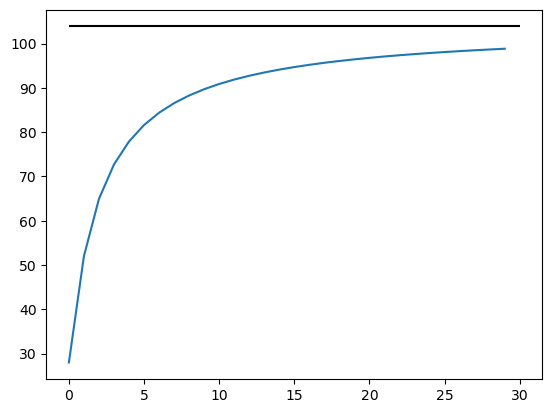

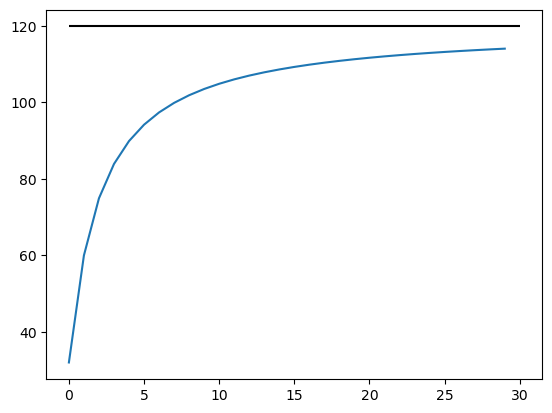

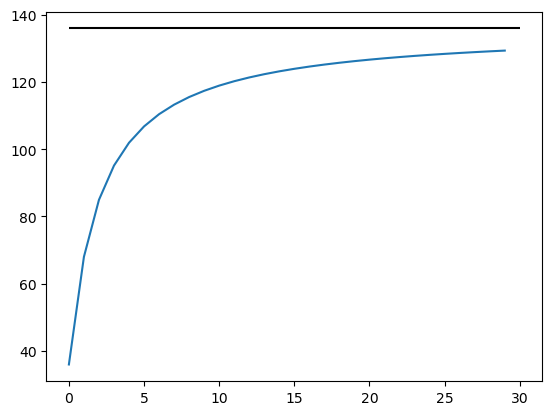

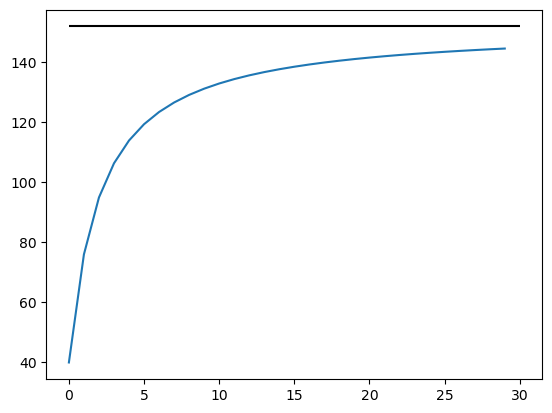

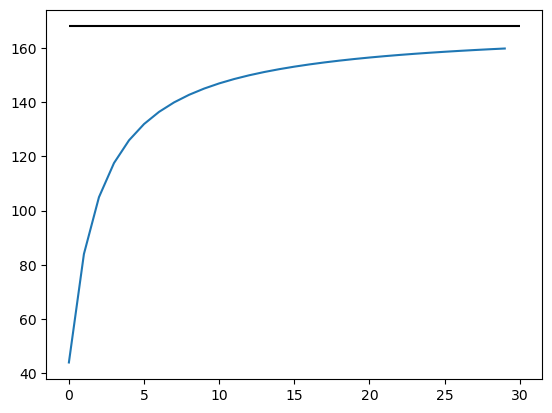

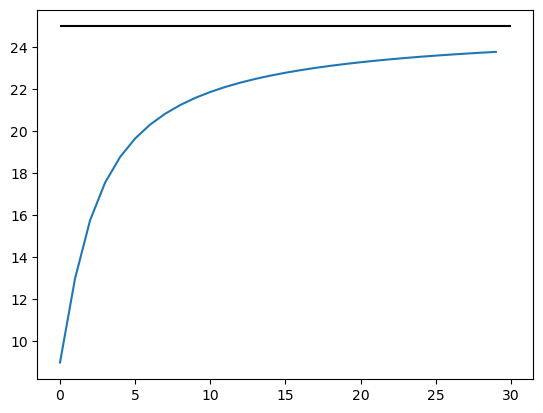

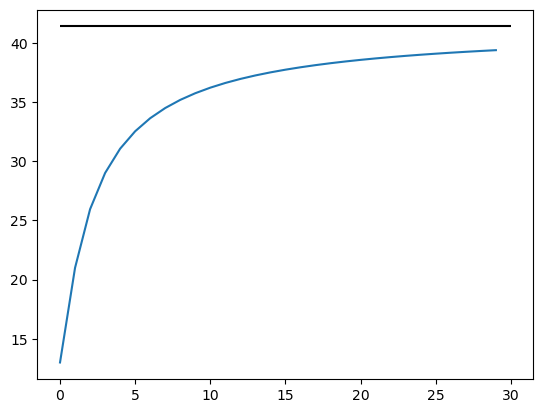

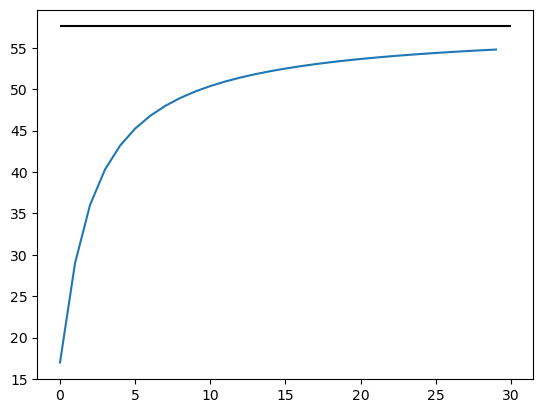

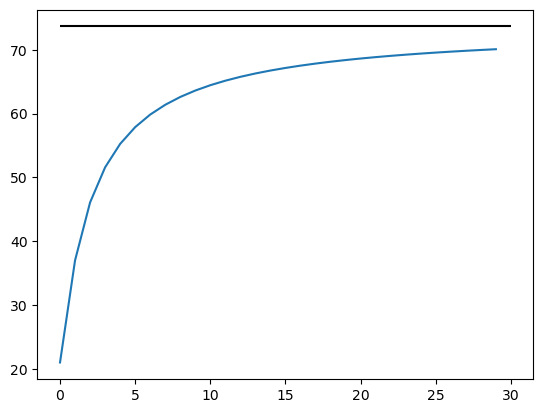

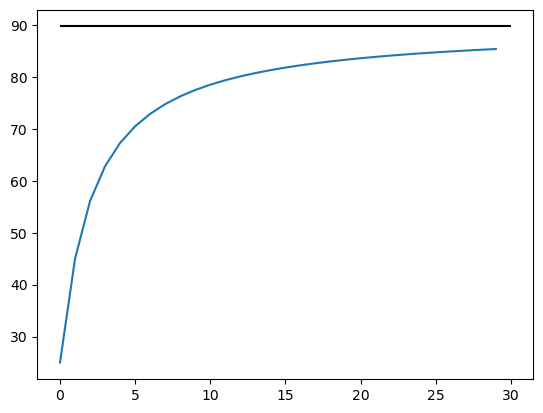

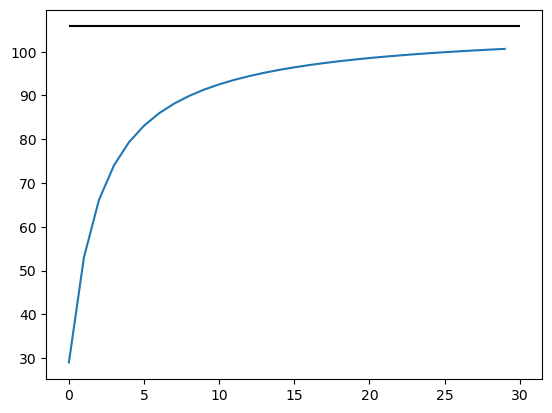

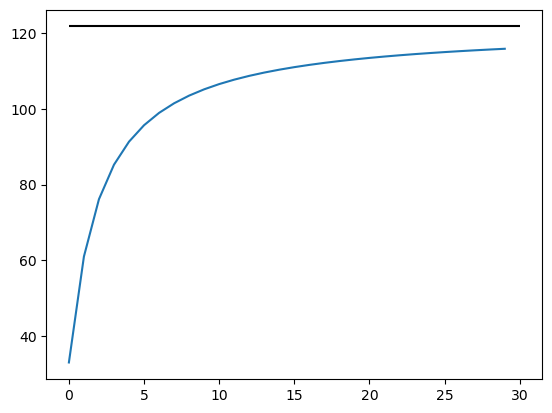

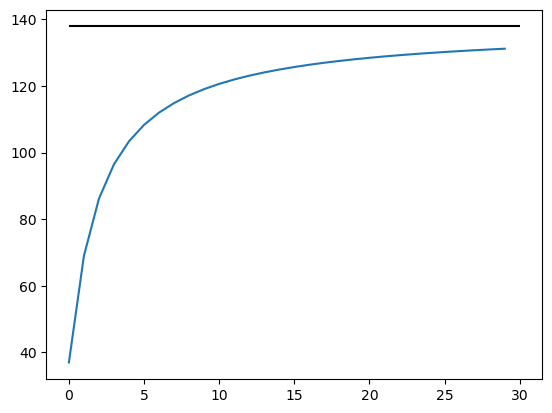

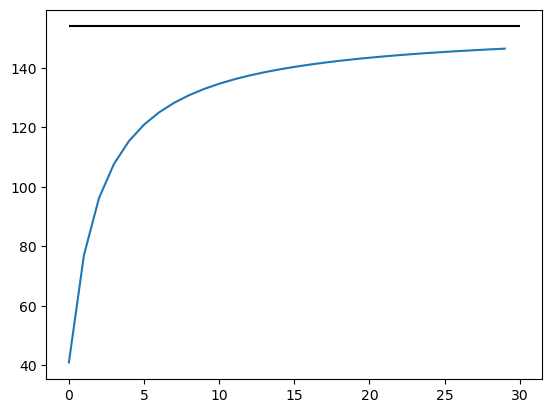

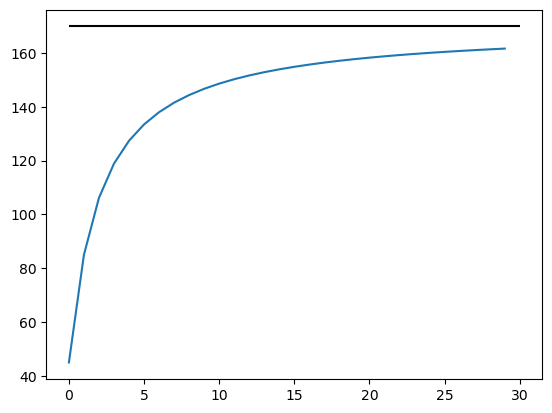

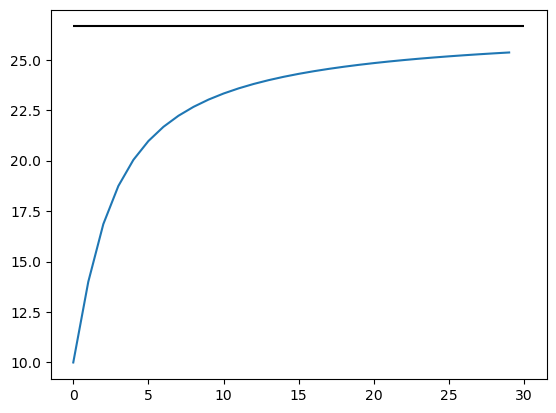

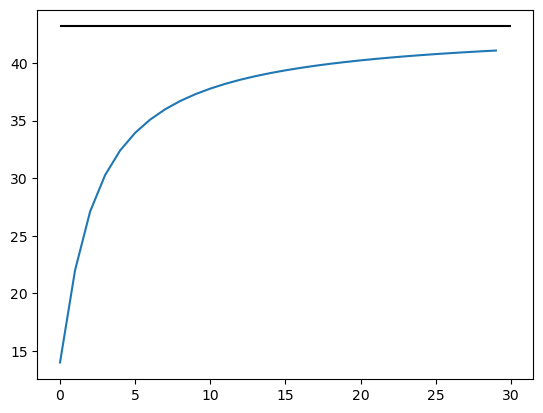

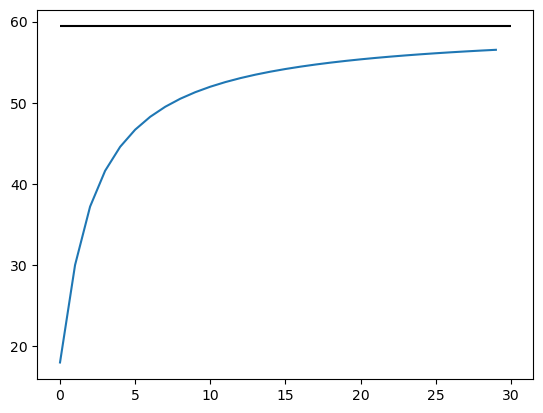

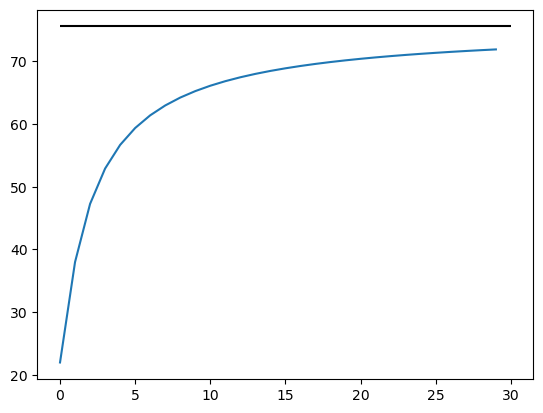

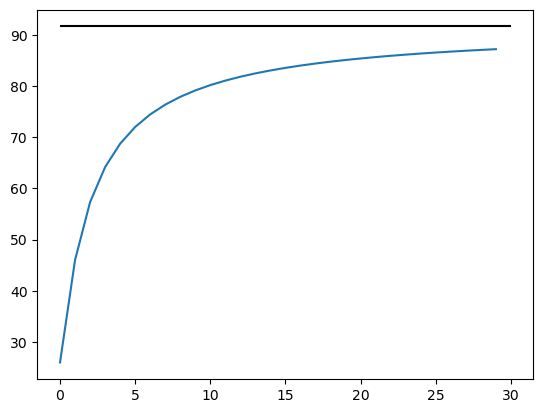

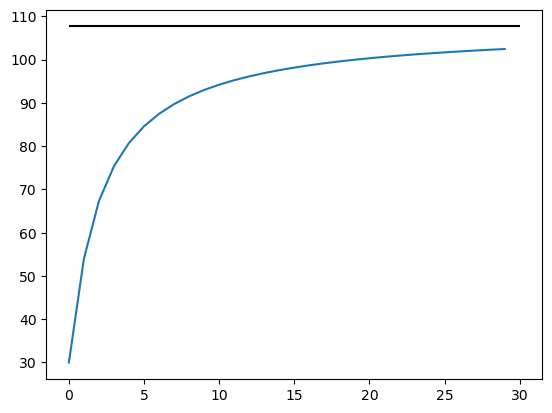

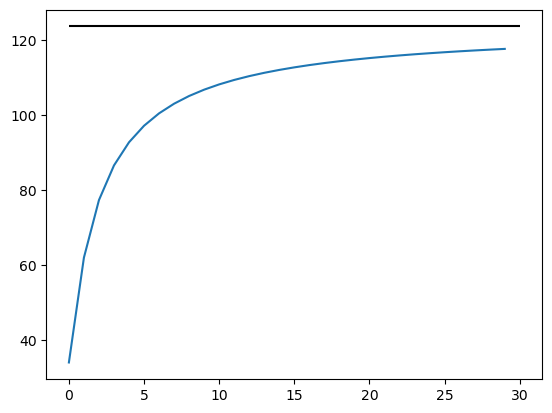

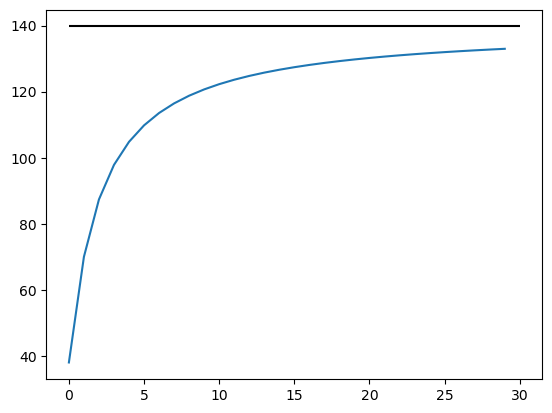

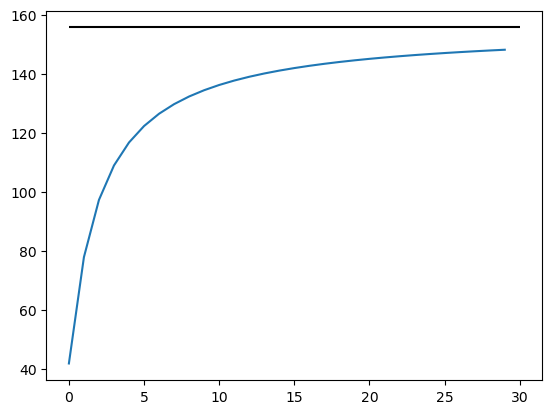

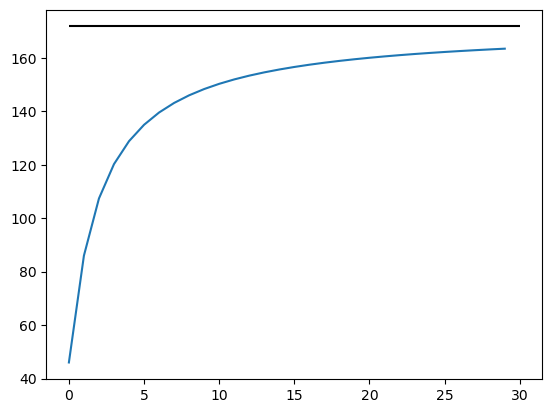

In [50]:
for K in range(1, 7):
    for N in range(1, 11):
        d_list_nkb = []
        for d_l in d_list_empiric:
            d_lnkb = d_l.subs(b, 4).subs(n, N).subs(k, K)
            d_list_nkb.append(d_lnkb)
        d_div = [float(d_list_nkb[i+1] / d_list_nkb[i]) for i in range(len(d_list_nkb)- 1)]
        plt.figure()
        plt.plot(d_div)
        r2bkn = r2b.subs(k, K).subs(n, N).n()
        plt.hlines(1 / r2bkn, 0, 30, 'black')
        plt.show()

This seems to work and we can now trust our simple approximations for $c_l$ and $d_l$.

### Compute  $\frac{c_{l+1} / c_l}{d_{l+1} / d_l}\approx\frac{r_2}{x_1}$

In [51]:
x2.subs(b, 4).subs(k, K).subs(n, N).n()

-1.28938349267337 + 0.e-20*I

In [52]:
# Approximation for c_l / d_l
for N in range(1,11):
    print(f'{N} & ', end='')
    for K in range(1,7):
        if K < 6:
            ending = ' & '
        else:
            ending = ' \\\\ \n'
        x1bnk = sympy.re(x1.subs(b, 4).subs(k, K).subs(n, N).n())
        r2bnk = r2b.subs(k, K).subs(n, N).n()
        print(f'{r2bnk / x1bnk:.4f}' + ending, end="")

1 & 0.9712 & 0.9356 & 0.9020 & 0.8713 & 0.8435 & 0.8183 \\ 
2 & 0.9881 & 0.9712 & 0.9533 & 0.9356 & 0.9185 & 0.9020 \\ 
3 & 0.9931 & 0.9827 & 0.9712 & 0.9593 & 0.9474 & 0.9356 \\ 
4 & 0.9954 & 0.9881 & 0.9799 & 0.9712 & 0.9623 & 0.9533 \\ 
5 & 0.9966 & 0.9912 & 0.9849 & 0.9782 & 0.9712 & 0.9641 \\ 
6 & 0.9974 & 0.9931 & 0.9881 & 0.9827 & 0.9770 & 0.9712 \\ 
7 & 0.9979 & 0.9944 & 0.9903 & 0.9859 & 0.9811 & 0.9762 \\ 
8 & 0.9983 & 0.9954 & 0.9919 & 0.9881 & 0.9841 & 0.9799 \\ 
9 & 0.9985 & 0.9961 & 0.9931 & 0.9899 & 0.9864 & 0.9827 \\ 
10 & 0.9987 & 0.9966 & 0.9941 & 0.9912 & 0.9881 & 0.9849 \\ 


$c_l / d_l$ are pretty close, which can also be seen in the following empirically.

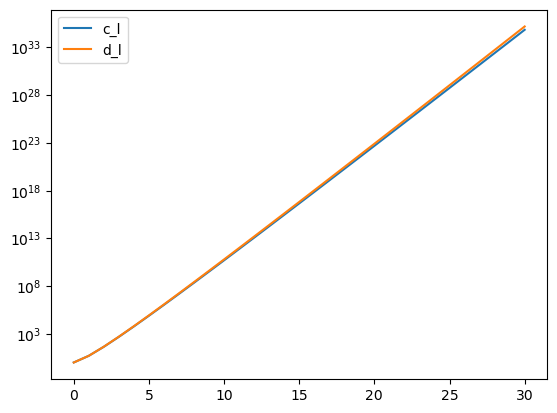

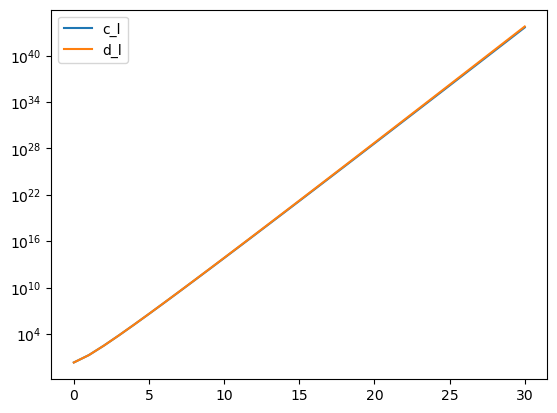

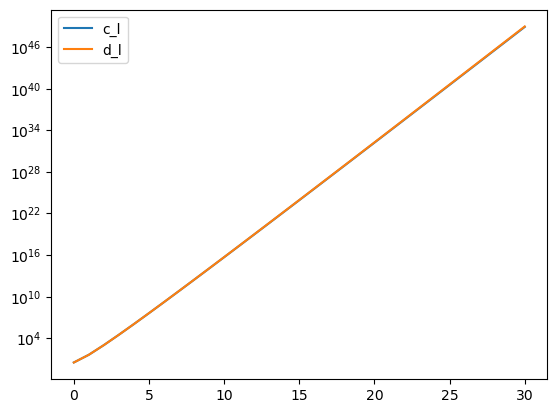

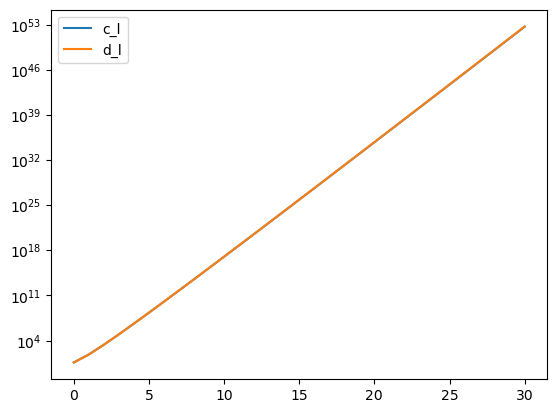

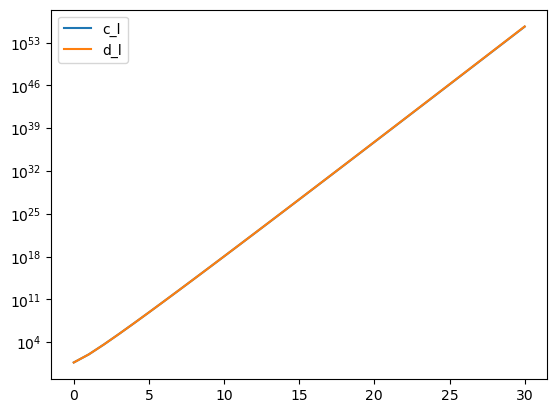

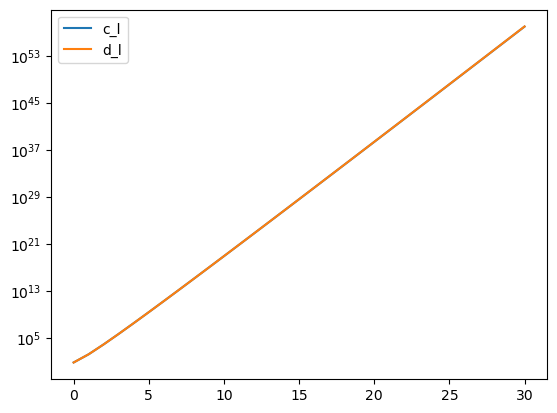

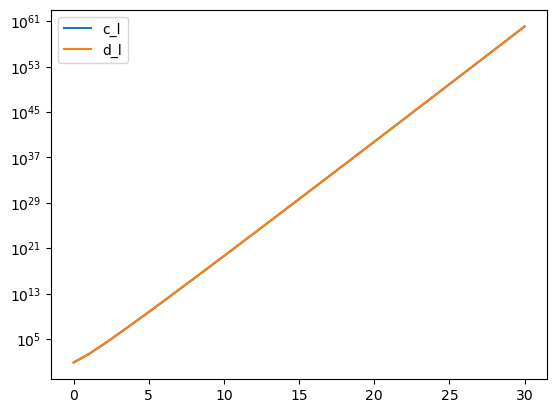

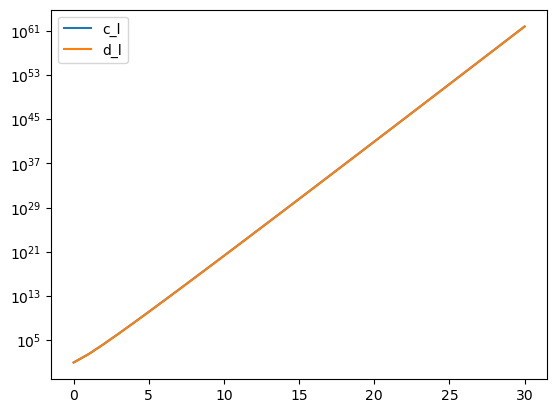

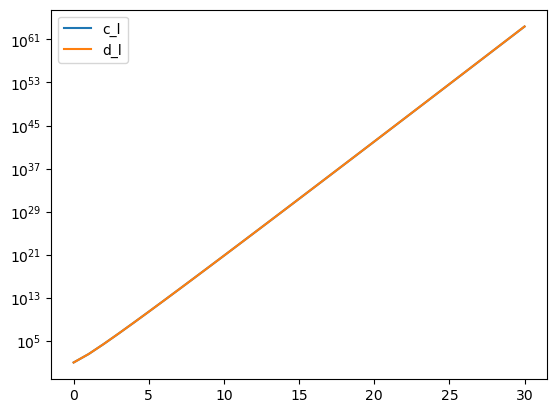

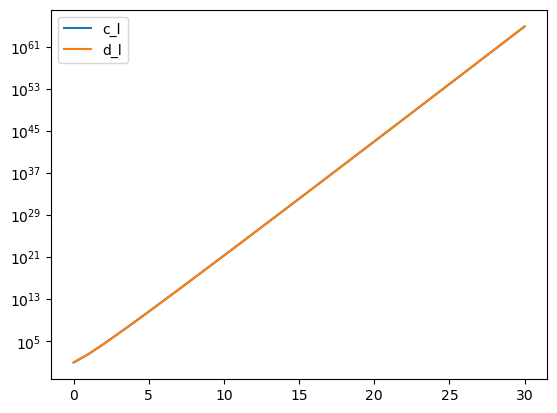

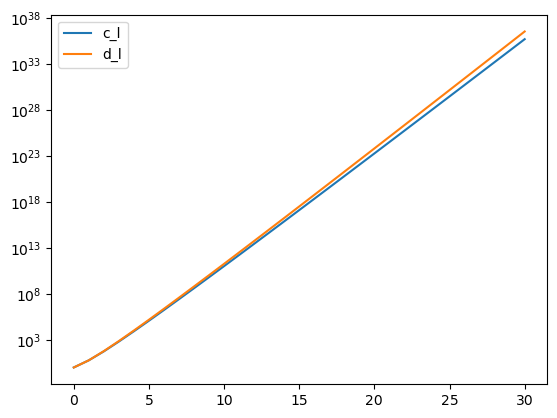

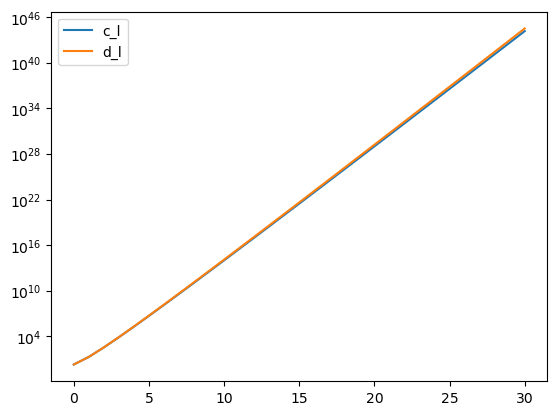

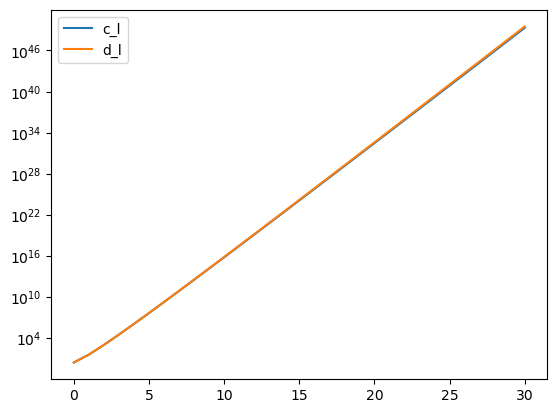

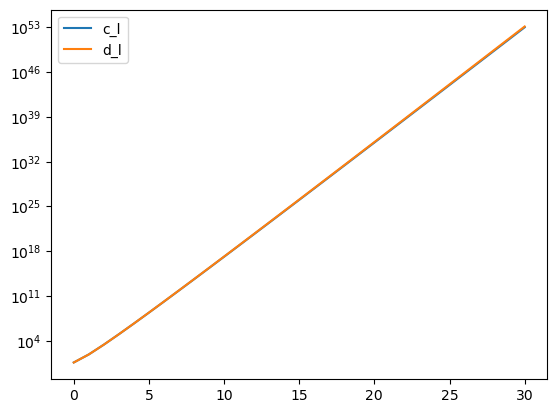

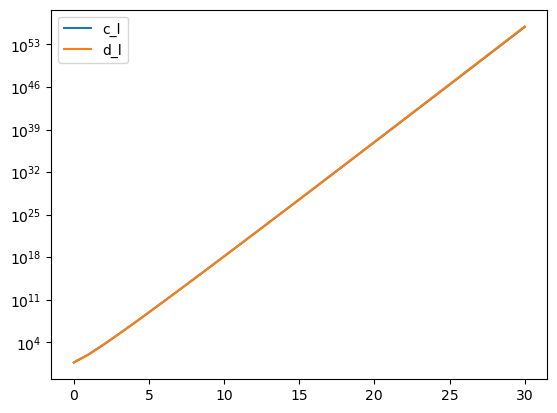

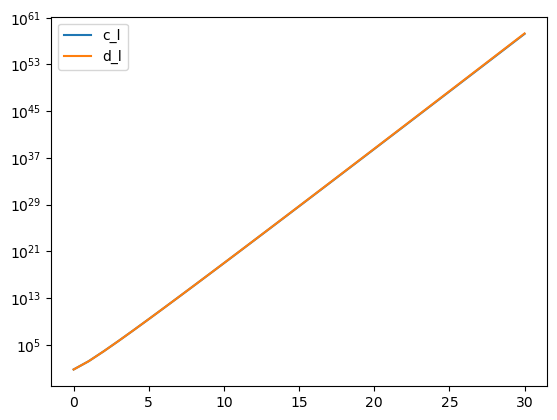

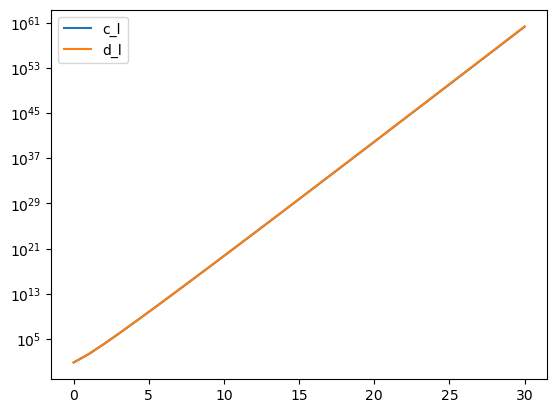

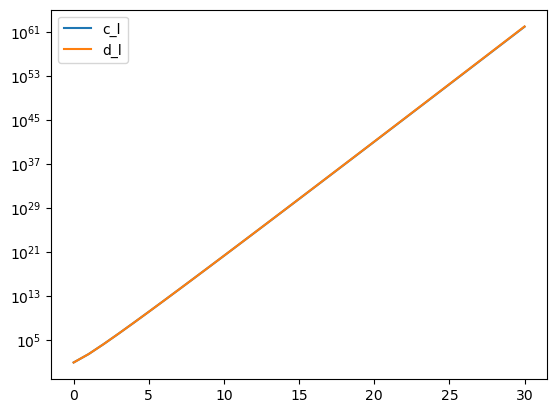

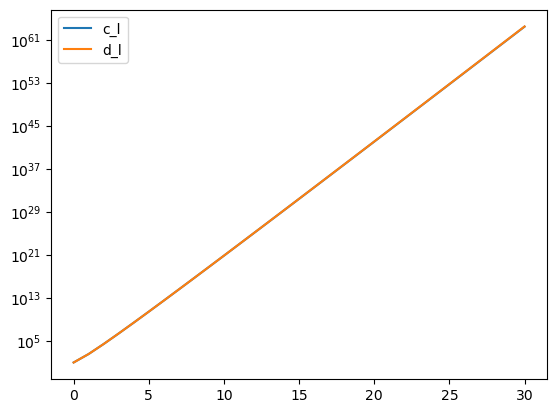

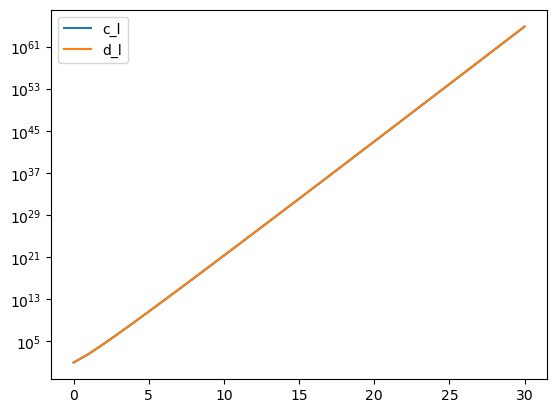

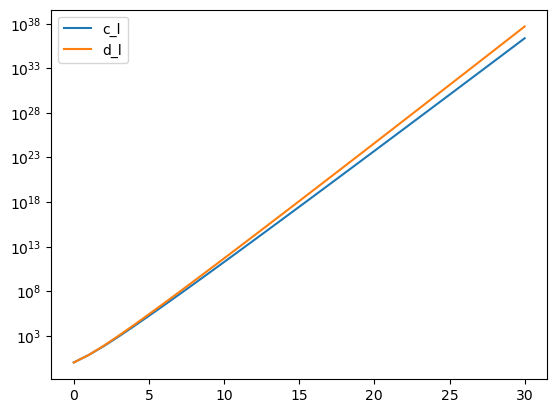

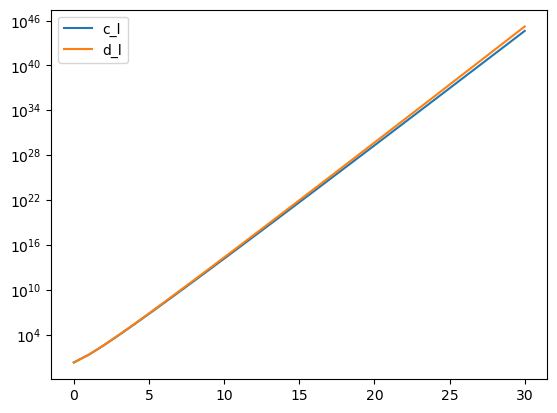

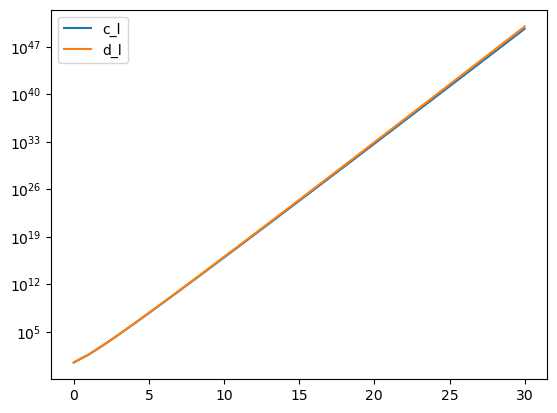

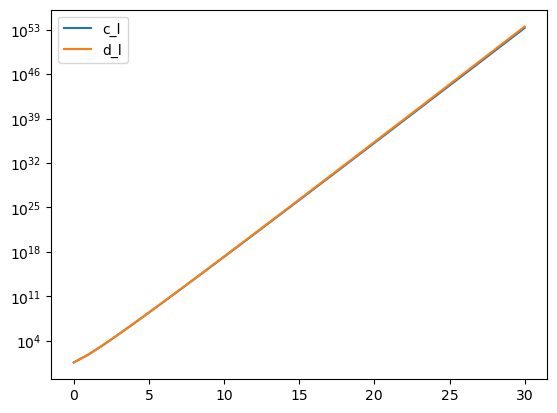

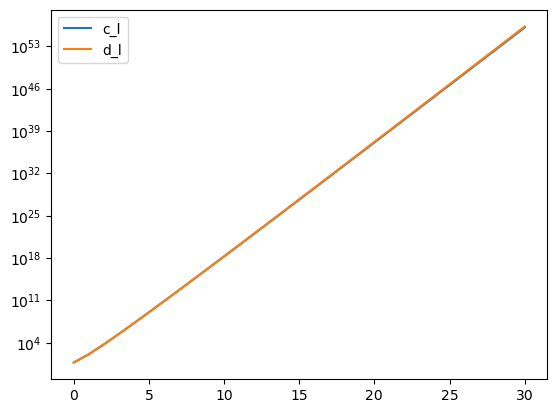

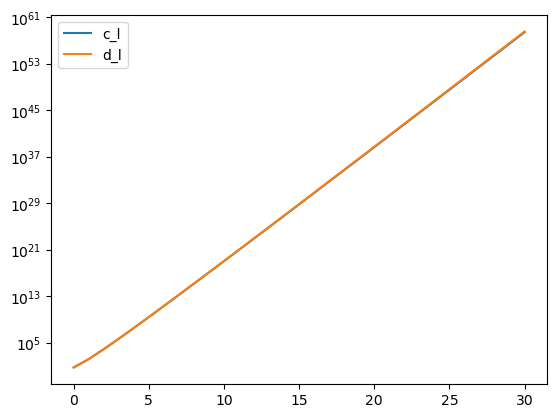

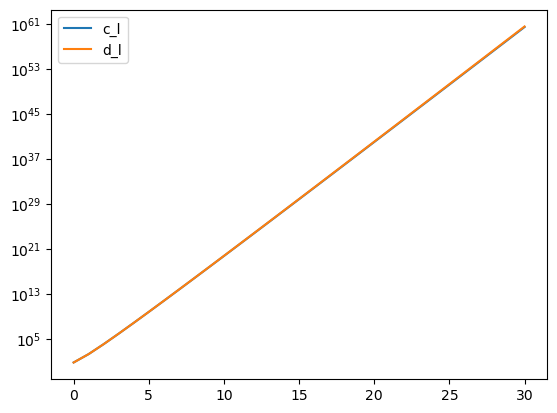

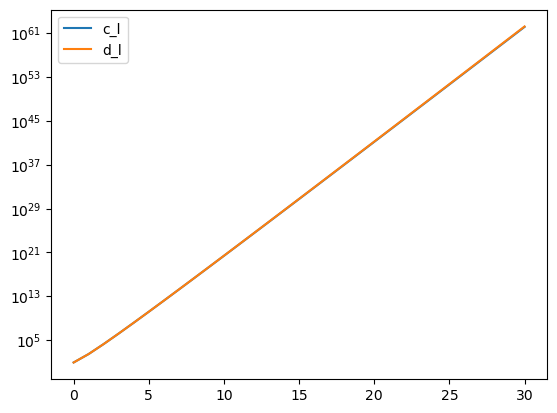

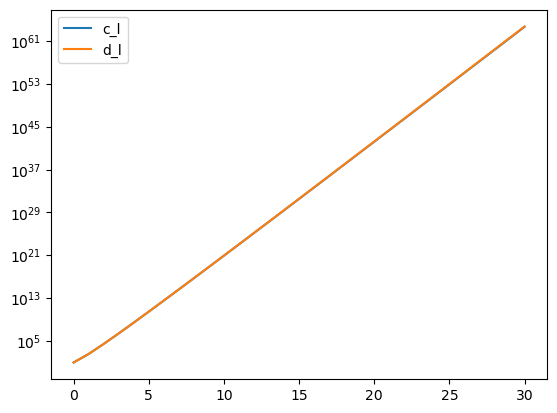

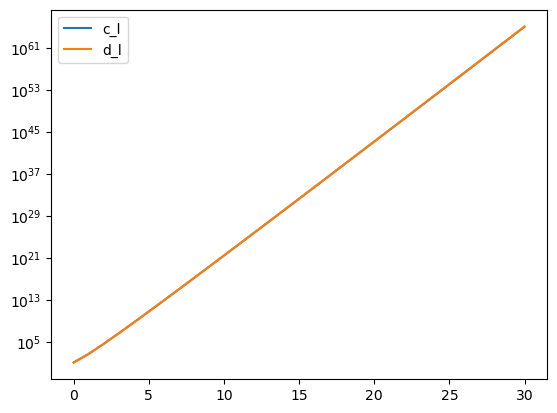

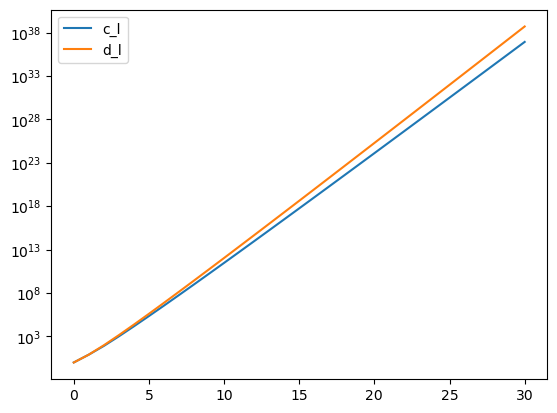

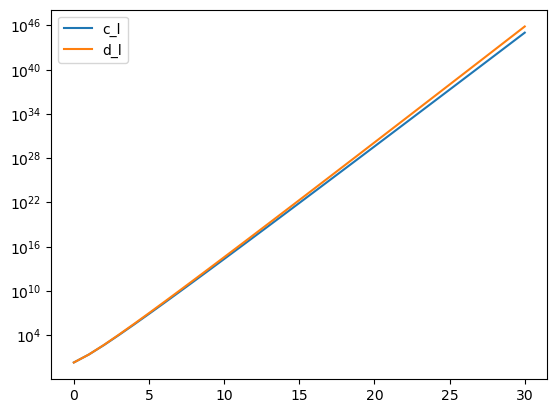

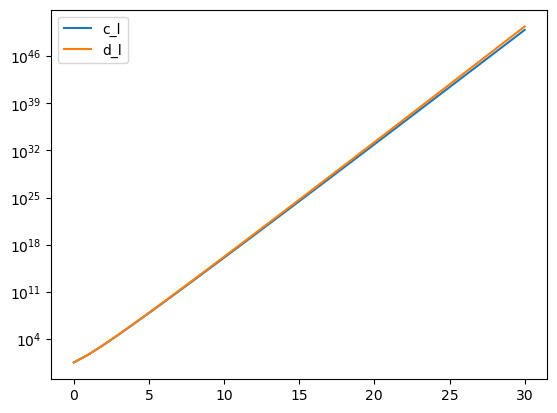

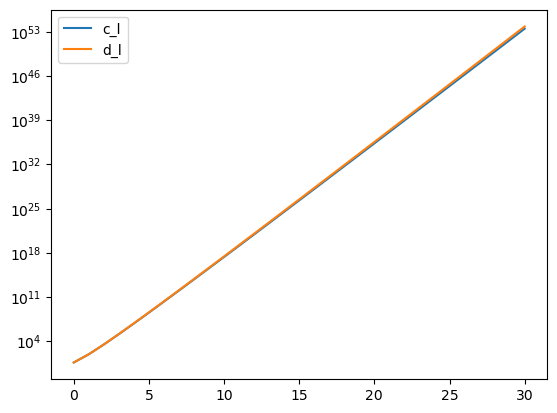

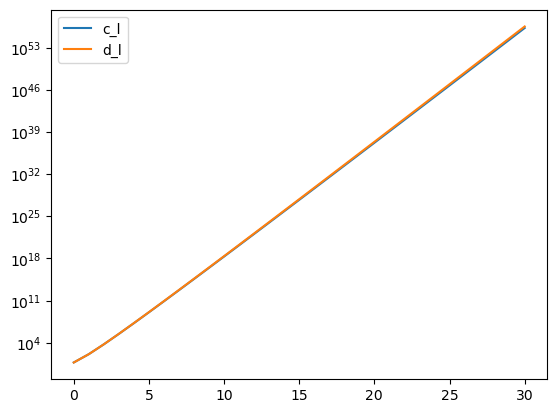

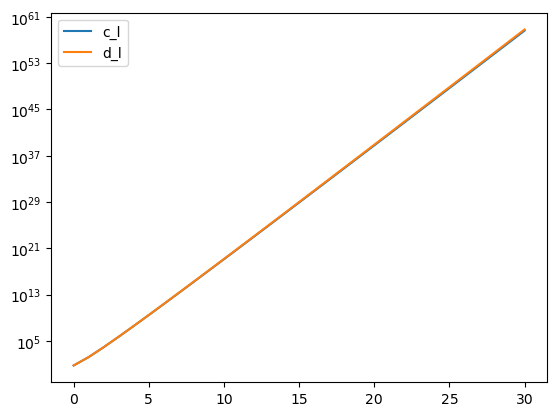

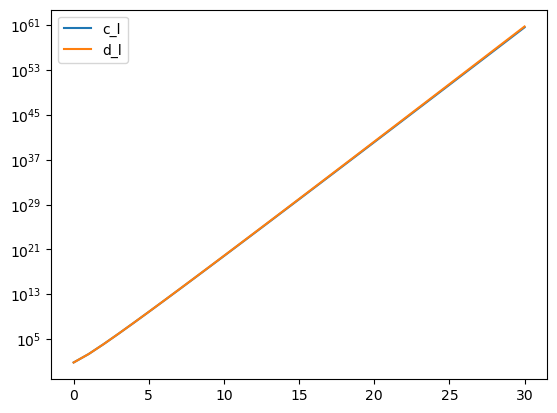

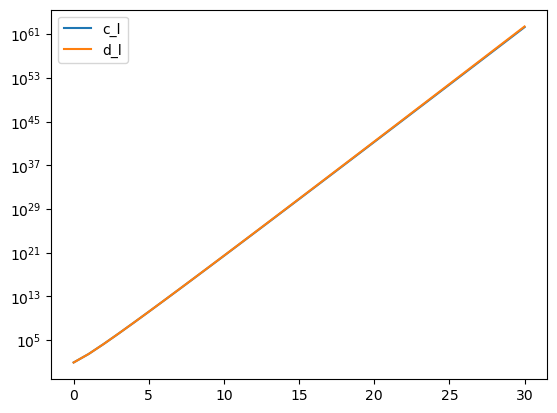

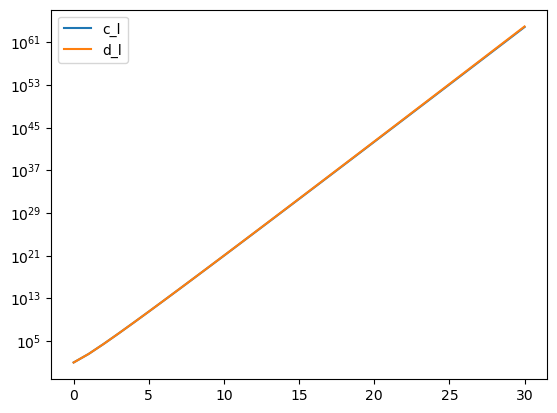

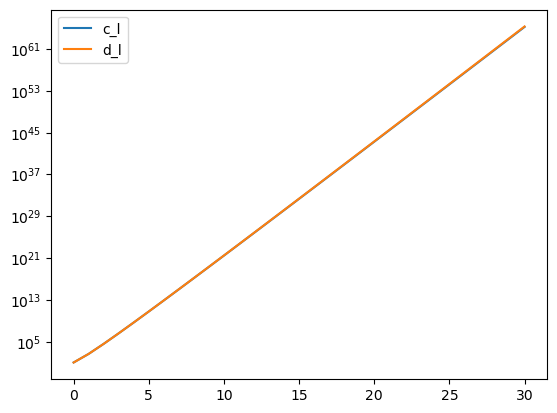

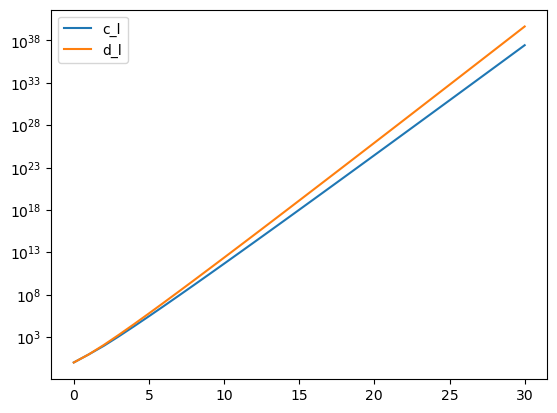

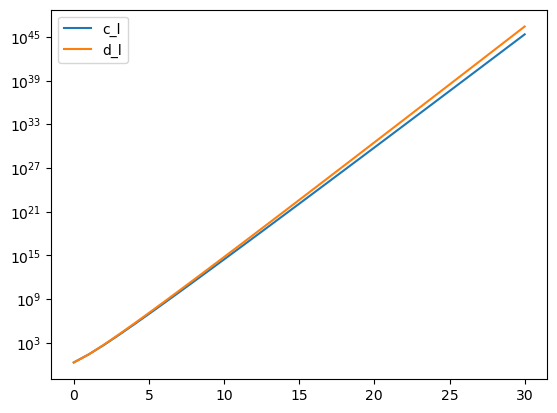

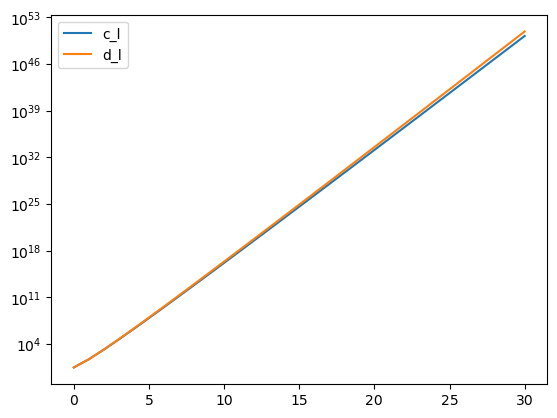

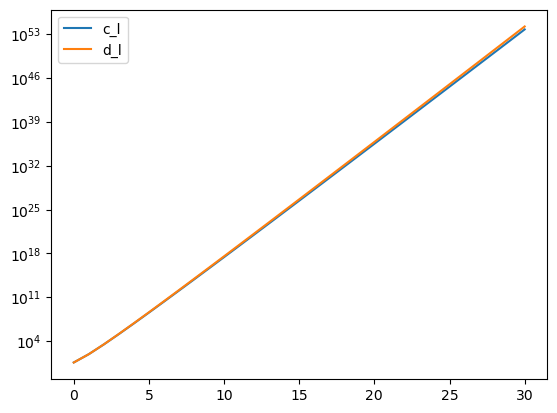

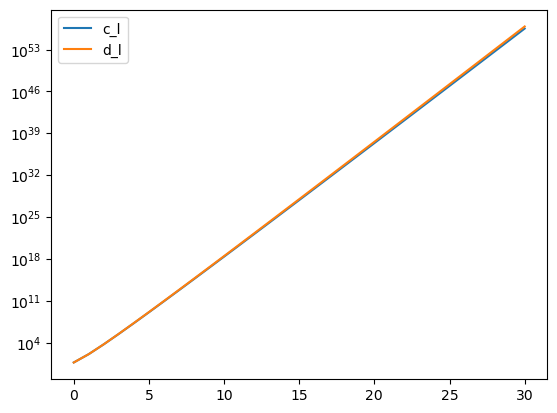

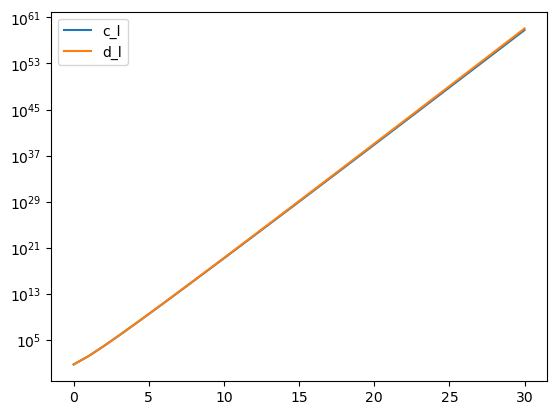

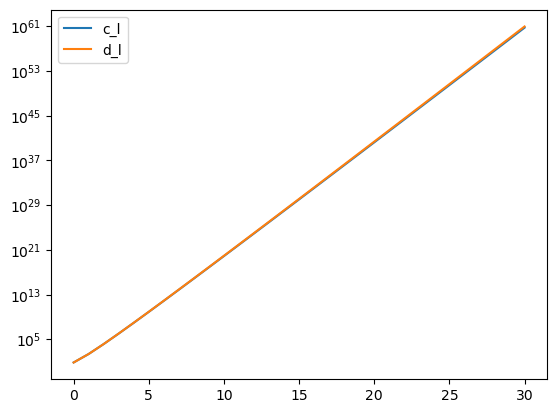

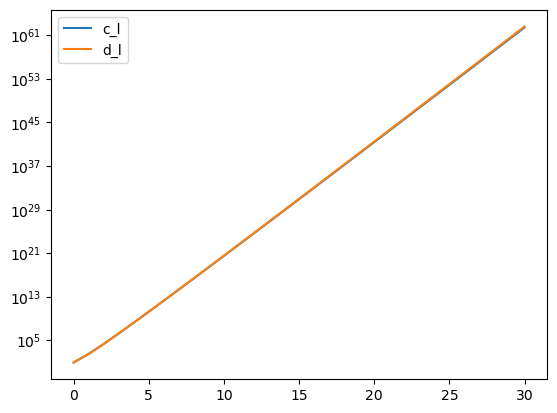

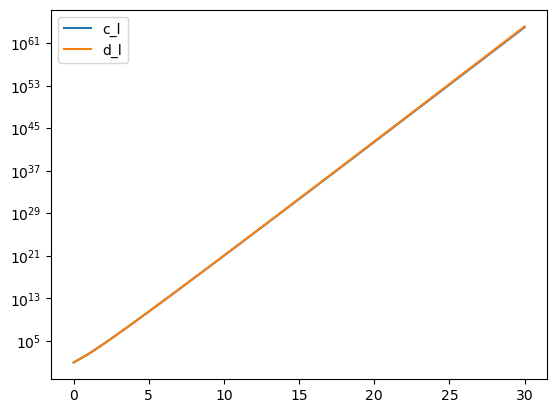

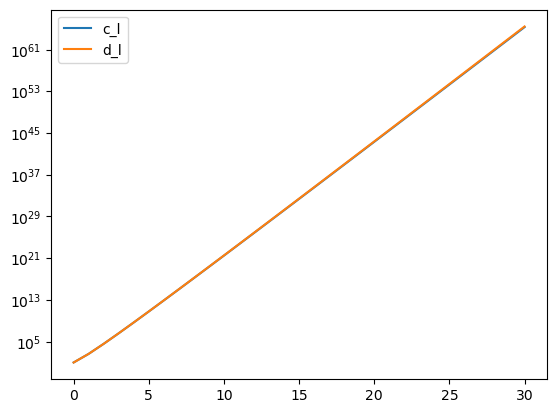

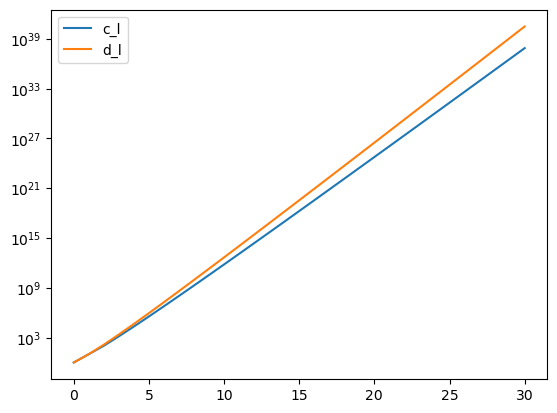

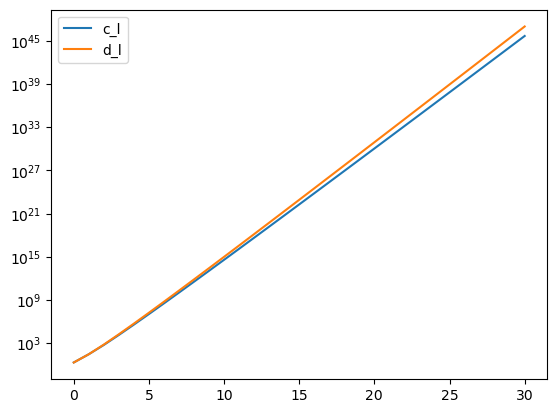

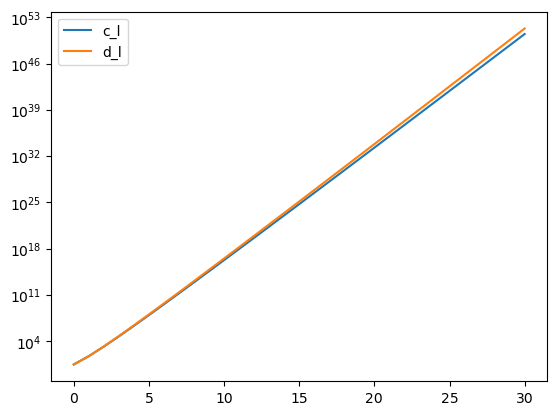

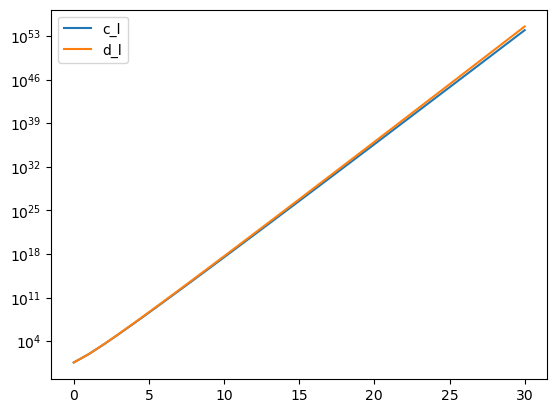

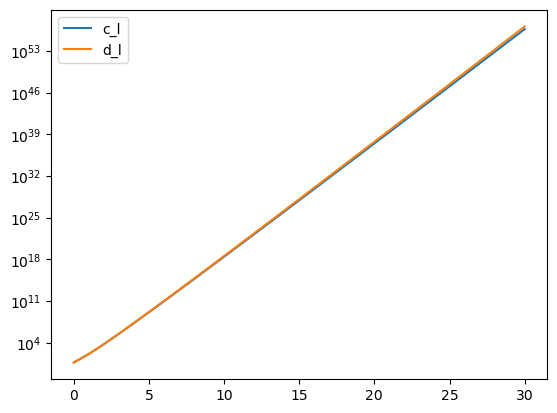

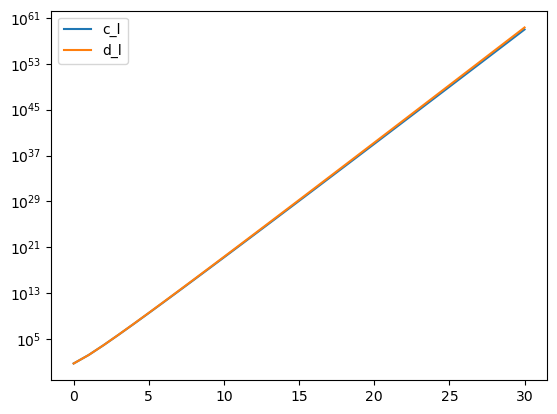

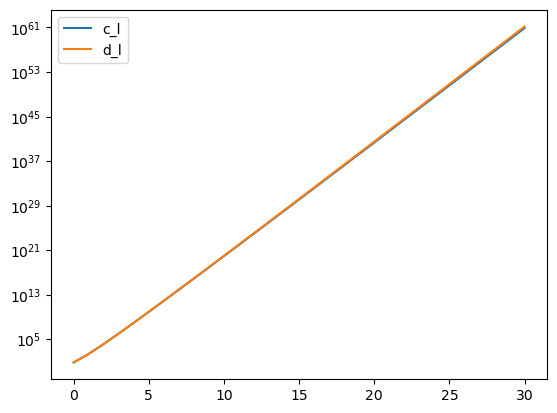

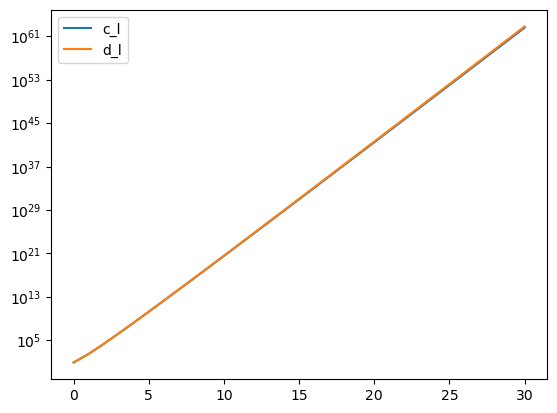

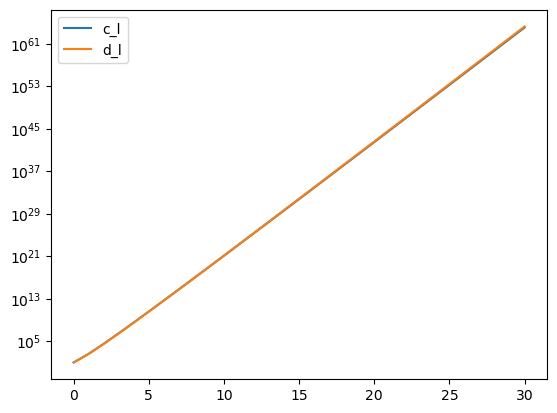

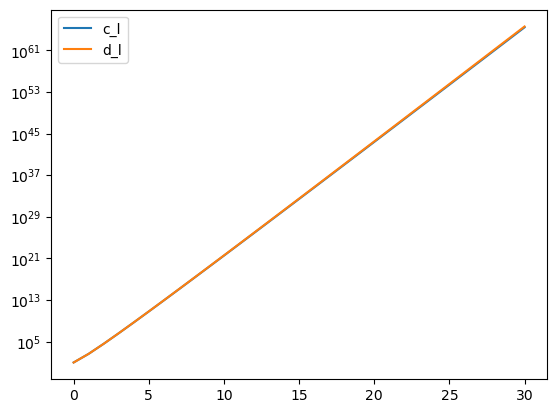

In [53]:
for K in range(1, 7):
    for N in range(1, 11):
        c_list_nkb = []
        for c_l in c_list:
            c_lnkb = c_l.subs(b, 4).subs(n, N).subs(k, K)
            c_list_nkb.append(c_lnkb)
        d_list_nkb = []
        for d_l in d_list_empiric:
            d_lnkb = d_l.subs(b, 4).subs(n, N).subs(k, K)
            d_list_nkb.append(d_lnkb)        
        plt.figure()
        plt.plot(c_list_nkb, label='c_l')
        plt.plot(d_list_nkb, label='d_l')
        plt.yscale('log')
        plt.legend()
        plt.show()

### Approximate $d_l$ using Theorem 2.5 
Theorem 2.5 gives
$$d_l= r_2^{-l-1}\lambda\sqrt{1-r_2/r_1}\frac{1}{2b\sqrt{4\pi (l+1)^3}}+O(r_2^{-l}l^{-5/2})$$
and 
$$d_l= \frac{1}{2b}\left(r_2^{-l-1}\lambda\sqrt{1-r_2/r_1}(\frac{1}{\sqrt{4\pi (l+1)^3}} + \frac{3}{8\sqrt{4\pi (l+1)^5}}) - r_2^{-l-1}\frac{\lambda r_2}{2\sqrt{1-\frac{r_2}{r_1}}r_1}\frac{3}{4\sqrt{\pi (l+1)^5}}\right)+O(r_2^{-l}l^{-7/2})$$
where 
$r_1=\frac{k+2bn+\sqrt{(k+2bn)^2-k^2}}{k^2}$
and 
$r_2=\frac{k+2bn-\sqrt{(k+2bn)^2-k^2}}{k^2}$
and $\lambda=k\sqrt{r_1r_2}$.


In [54]:
r_1 = (k+2*b*n+((k+2*b*n)**2-k**2)**(1/2)) / k**2
r_1

(2*b*n + k + (-k**2 + (2*b*n + k)**2)**0.5)/k**2

In [55]:
r_2 = (k+2*b*n-((k+2*b*n)**2-k**2)**(1/2)) / k**2
r_2

(2*b*n + k - (-k**2 + (2*b*n + k)**2)**0.5)/k**2

In [56]:
r_1 = r_1.simplify()
r_2 = r_2.simplify()

In [57]:
lamb = (k*(r_1*r_2)**(0.5)).simplify()
lamb

1.0*k*((4*b**2*n**2 + 4*b*k*n + k**2 - 4*(b*n*(b*n + k))**1.0)/k**4)**0.5

In [58]:
l = sympy.Symbol('l')

In [59]:
d_l_approx1 = r_2**(-l-1)*lamb*(1-r_2/r_1)**(0.5)/(2*b*(4*sympy.pi*(l+1)**3))
d_l_approx1 = d_l_approx1.simplify()
d_l_approx1

0.25*k*((4*b**2*n**2 + 4*b*k*n + k**2 - 4*(b*n*(b*n + k))**1.0)/k**4)**0.5*((2*b*n + k - 2.0*(b*n*(b*n + k))**0.5)/k**2)**(-l - 1)*((b*n*(b*n + k))**0.5/(2*b*n + k + 2.0*(b*n*(b*n + k))**0.5))**0.5/(pi*b*(l + 1)**3)

In [61]:
r1s = sympy.Symbol('r_1')
r2s = sympy.Symbol('r_2')
lambdas = sympy.Symbol('\lambda')
d_l_approx2s = 1/2 / b * (r2s**(-l-1)*lambdas*sympy.sqrt(1-r2s/r1s)*(1/(sympy.sqrt(4*sympy.pi*(l+1)**3))+ 3/(8*sympy.sqrt(4*sympy.pi*(l+1)**5)))-r2s**(-l-1)*lambdas*r2s / (2*sympy.sqrt(1-r2s/r1s)*r1s)*3/(4*sympy.sqrt(sympy.pi*(l+1)**5)))
d_l_approx2s

0.5*(\lambda*r_2**(-l - 1)*sqrt(1 - r_2/r_1)*(3/(16*sqrt(pi)*sqrt((l + 1)**5)) + 1/(2*sqrt(pi)*sqrt((l + 1)**3))) - 3*\lambda*r_2*r_2**(-l - 1)/(8*sqrt(pi)*r_1*sqrt(1 - r_2/r_1)*sqrt((l + 1)**5)))/b

In [62]:
d_l_approx2 = d_l_approx2s.subs(lambdas, lamb).subs(r1s, r_1).subs(r2s, r_2)

In [64]:
d_list_approx1 = [d_l_approx1.subs(l, l1) for l1 in range(len(d_list_empiric))]
d_list_approx2 = [d_l_approx2.subs(l, l1) for l1 in range(len(d_list_empiric))]

K, N = 3, 5

d_list_approx1_nkb = [sympy.re(d_l.subs(b, 4).subs(n, N).subs(k, K).n()) for d_l in d_list_approx1] # Take the real part to get rid of ~i10^{-16}
d_list_approx2_nkb = [sympy.re(d_l.subs(b, 4).subs(n, N).subs(k, K).n()) for d_l in d_list_approx2] # Take the real part to get rid of ~i10^{-16}
d_list_empiric_nkb = [d_l.subs(b, 4).subs(n, N).subs(k, K) for d_l in d_list_empiric]


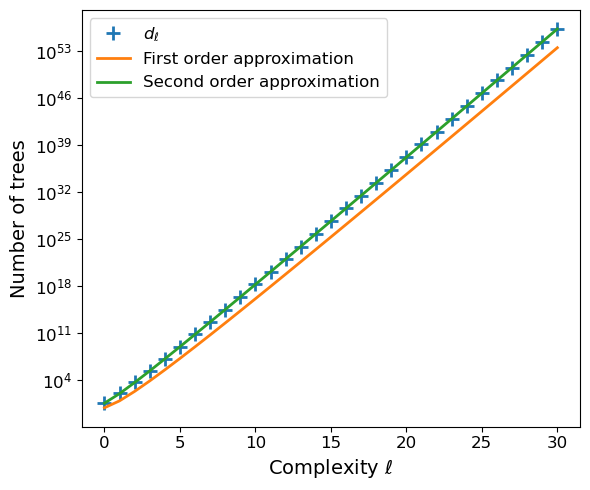

In [134]:
fontsize = 14
linewidth = 2.0
markersize = 10

plt.figure(figsize=(6, 5))
plt.plot(d_list_empiric_nkb, '+', label='$d_\ell$', markersize=markersize, linewidth=linewidth, markeredgewidth=linewidth)
plt.plot(d_list_approx1_nkb, label='First order approximation', linewidth=linewidth)
plt.plot(d_list_approx2_nkb, label='Second order approximation', linewidth=linewidth)
plt.yscale('log')
plt.legend(prop={'size': fontsize-2})
plt.xlabel('Complexity $\ell$', fontsize=fontsize)
plt.ylabel('Number of trees', fontsize=fontsize)
plt.xticks(fontsize=fontsize-2)
plt.yticks(fontsize=fontsize-2)
plt.tight_layout()
plt.savefig('dl.pdf')
plt.show()

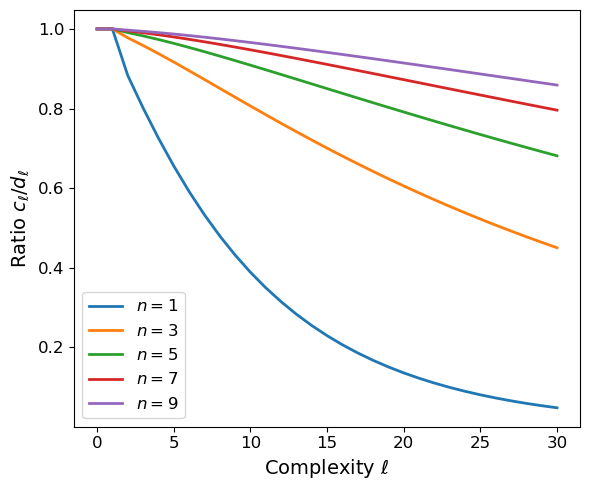

In [137]:
B, K = 4, 3

c_list_empiric_kb = [c_l.subs(b, 4).subs(k, K) for c_l in c_list]
d_list_empiric_kb = [d_l.subs(b, 4).subs(k, K) for d_l in d_list_empiric]


ratio_list_empiric_kb = [c_list_empiric_kb[i] / d_list_empiric_kb[i] for i in range(len(c_list_empiric_nkb))]

fontsize = 14

plt.figure(figsize=(6, 5))
for N in range(1, 11, 2):
    ratio_list_empiric_nkb = [ratio.subs(n, N) for  ratio in ratio_list_empiric_kb]
    plt.plot(ratio_list_empiric_nkb, label=f'$n={N}$', linewidth=linewidth)
    # plt.yscale('log')
    plt.legend(prop={'size': fontsize-2})
    plt.xlabel('Complexity $\ell$', fontsize=fontsize)
    plt.ylabel('Ratio $c_\ell/d_\ell$', fontsize=fontsize)
    plt.xticks(fontsize=fontsize-2)
    plt.yticks(fontsize=fontsize-2)
plt.tight_layout()
plt.savefig('ratio_cl_dl.pdf')
plt.show()